In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def de_jong_1(x):
    """
    It takes a vector of numbers and returns the sum of the squares of those numbers.

    :param x: A numpy array of size (n,).
    :return:  The sum of the squares of the elements of x.
    """
    return np.sum(x ** 2)


def de_jong_2(x):
    """
    It's a paraboloid with a minimum at (1, 1).

    :param x: The input vector.
    :return:  The value of the function at the point x.
    """
    return 100 * ((x[0] ** 2 - x[1]) ** 2) + ((1 - x[0]) ** 2)


def de_jong_3(x):
    """
    It returns the sum of the ceiling of each element in the input vector, plus 24.

    :param x: A numpy array of size 2.
    :return:  The sum of the ceiling of each element in the array.
    """
    return np.sum(np.ceil(x)) + 24


def de_jong_4(x):
    """
    It returns the sum of the fourth powers of the elements of the input vector, plus a random number.

    :param x: The input vector.
    :return:  The sum of the elements of x to the power of 4, plus a random number.
    """
    random_matrix = {}
    if str(list(x)) in random_matrix.keys():
        r = random_matrix[str(list(x))]
    else:
        r = np.random.randn()
        random_matrix[str(list(x))] = r
        random_matrix[str(list(x[::-1]))] = r

    return np.sum(x ** 4) + r


def de_jong_5(x):
    """
    It's a sum of 25 terms, each of which is the inverse of the sum of the square of the distance between the input and
    a point in a 5x5 grid, plus the inverse of the term's index.

    :param x: The input vector.
    :return:  The value of the function at the point x.
    """

    a_up = np.tile([-32, -16, 0, 16, 32], 5)
    a_down = np.transpose(np.tile([-32, -16, 0, 16, 32], (5, 1))).flatten()
    a = np.stack([a_up, a_down])

    d = 0.002
    for i in range(25):
        d += 1 / (i + 1 + (x[0] - a[0][i]) ** 6 + (x[1] - a[1][i]) ** 6)
    return 1 / d


# It's a class that defines a function that takes in a vector of length 2 and returns a scalar
class DeJong:
    dimension: int
    function_name: str
    range: (float, float)
    resolution_factor: float
    num_bits: int
    funcs = {1: ('De Jong 1', de_jong_1, 5.12, 0.01, 3),
             2: ('De Jong 2', de_jong_2, 2.048, 0.001, 2),
             3: ('De Jong 3', de_jong_3, 5.12, 0.01, 4),
             4: ('De Jong 4', de_jong_4, 1.28, 0.01, 30),
             5: ('De Jong 5', de_jong_5, 65.536, 0.001, 2)}

    def __init__(self, func_number, dimension_in=False):
        """
        The function takes in a function number and an optional dimension. It then sets the function name, function,
        minimum value, resolution factor, and dimension. It also sets the number of digits after the decimal point,
        the range, and the number of bits.

        :param func_number:  The number of the function you want to use.
        :param dimension_in: The dimension of the function. If not specified, it will be set to the default value,
                             defaults to False (optional).
        """
        assert isinstance(func_number, int), f'func_number needs to be an integer!!!'
        assert 6 > func_number > 0, 'func_number needs to be a number between 1 and 5'
        self.function_name, self.fun, min_, self.resolution_factor, self.dimension = self.funcs[func_number]
        self.digits_after = len(str(self.resolution_factor)[2:])
        self.range = (-min_, min_)
        self.num_bits = int(np.log2(int(2 * (min_ / self.resolution_factor))))
        if dimension_in:
            self.dimension = dimension_in

    def decode_(self, x):
        """
        The function takes in a string and returns the string.

        :param x: The input to the encoder.
        :return:  The input x is being returned.
        """
        return x

    def evaluate(self, x_e, gray_=False):
        """
        The function takes in a list of binary strings, and returns a list of fitness values.

        :param x_e:   The encoded population.
        :param gray_: Whether to use gray code or not, defaults to False (optional).
        :return:      The fitness of the population.
        """
        assert len(x_e[0]) == self.dimension, 'the dimension does not match with the problem'
        if gray_:
            self.decode = self.gray_decode
        else:
            self.decode = self.decode_
        fitness_pop_list = []
        for i in range(len(x_e)):
            pos = []
            for dim in range(self.dimension):
                pos.append(self.decode(x_e[i][dim]))
            fitness_pop_list.append(self.fun(np.array(pos)))
        return np.array(fitness_pop_list)

    def gray_encode(self, n_f):
        """
        The function takes a float value and converts it to a binary string.

        :param n_f: The number to encode.
        :return:    The gray code of the number.
        """
        scale = int(1 / self.resolution_factor)
        n = int(np.round(n_f * scale - self.range[0] * scale))
        val = n ^ n >> 1
        r_val = f"{val:>b}"
        pad = "0" * (self.num_bits - len(r_val))
        return pad + r_val

    def gray_decode(self, n_s):
        """
        The function takes a binary string as input, converts it to an integer, and then uses the bitwise XOR operator
        to convert the integer to its Gray code equivalent.

        :param n_s: The binary string of the gray code.
        :return:    The decoded value of the gray code.
        """
        n = int(n_s, 2)
        m = n >> 1
        while m:
            n ^= m
            m >>= 1
        n_f = np.around(self.range[0] + self.resolution_factor * n, self.digits_after)
        return n_f

    def plot(self):
        """
        We create a 3D plot of the function, with the x and y axes being the input variables and the z axis being the
        output of the function.
        """
        samples = int(1 / self.resolution_factor)
        plt.figure()
        ax = plt.axes(projection="3d")

        x = np.linspace(self.range[0], self.range[1], samples)
        y = np.linspace(self.range[0], self.range[1], samples)

        xx, yy = np.meshgrid(x, y)
        z = np.stack([xx.flatten(), yy.flatten()], axis=-1)
        zz = np.apply_along_axis(self.fun, -1, z)
        zz = np.resize(zz, (samples, samples))

        # ax.plot_wireframe(X, Y, Z, color='green')
        ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.contour(xx, yy, zz, zdir='z', cmap=cm.coolwarm)
        ax.contour(xx, yy, zz, zdir='x', cmap=cm.coolwarm)
        ax.contour(xx, yy, zz, zdir='y', cmap=cm.coolwarm)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('f(x,y) ')

        plt.show()

## Genetics Algorithm (GA) for Dejong Function Optimization (FO)

### De Jong Functions

De Jong 1,
Global minimum = 0,
Dimension (genes): 3,
Range interval: (-5.12, 5.12),
Resolution factor: 0.01,
Number of bits for dimension: 10,
Number of bits for individual: 30.


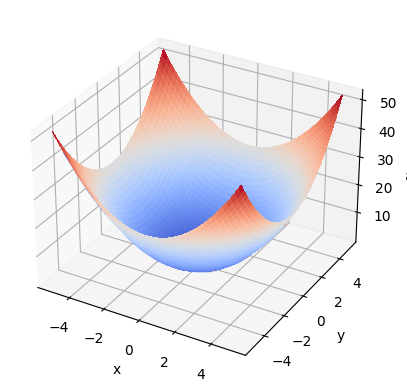

In [3]:
# Creating a DeJong object with the function number 1.
DJ1 = DeJong(1)
# Printing the function name, global minimum, dimension, range interval, resolution factor, number of bits for dimension,
# and number of bits for individual. It is also plotting the function.
print(
  f"{DJ1.function_name},\nGlobal minimum = 0,\nDimension (genes): {DJ1.dimension},\nRange interval: {DJ1.range},\nResolution factor: {DJ1.resolution_factor},\nNumber of bits for dimension: {DJ1.num_bits},\nNumber of bits for individual: {DJ1.num_bits * DJ1.dimension}.")
DJ1.plot()

De Jong 2 or Rosenbrock’s valley or banana function,
Global minimum = 0,
Dimension (genes): 2,
Range interval: (-2.048, 2.048),
Resolution factor: 0.001,
Number of bits for dimension: 12,
Number of bits for individual: 24.


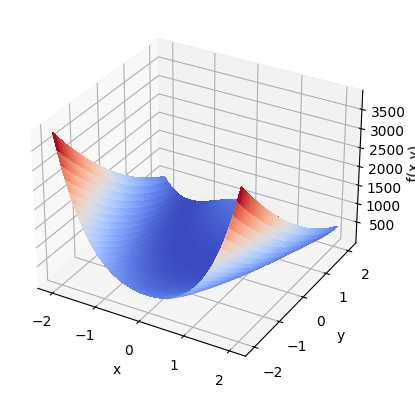

In [4]:
# Creating a DeJong object with the function number 2.
DJ2 = DeJong(2)
print(
  f"{DJ2.function_name} or Rosenbrock’s valley or banana function,\nGlobal minimum = 0,\nDimension (genes): {DJ2.dimension},\nRange interval: {DJ2.range},\nResolution factor: {DJ2.resolution_factor},\nNumber of bits for dimension: {DJ2.num_bits},\nNumber of bits for individual: {DJ2.num_bits * DJ2.dimension}.")
DJ2.plot()

De Jong 3,
Dimension (genes): 4,
Range interval: (-5.12, 5.12),
Resolution factor: 0.01,
Number of bits for dimension: 10,
Number of bits for individual: 40.


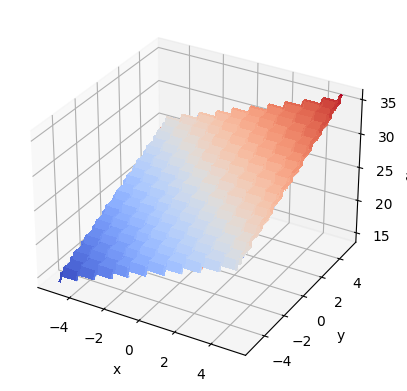

In [5]:
# Creating a DeJong object with the function number 3.
DJ3 = DeJong(3)
print(
  f"{DJ3.function_name},\nDimension (genes): {DJ3.dimension},\nRange interval: {DJ3.range},\nResolution factor: {DJ3.resolution_factor},\nNumber of bits for dimension: {DJ3.num_bits},\nNumber of bits for individual: {DJ3.num_bits * DJ3.dimension}.")
DJ3.plot()

De Jong 4,
Dimension (genes): 30,
Range interval: (-1.28, 1.28),
Resolution factor: 0.01,
Number of bits for dimension: 8,
Number of bits for individual: 240.


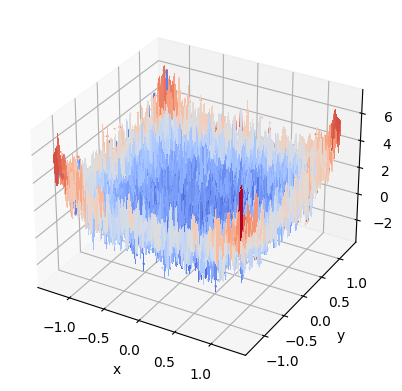

In [6]:
# Creating a DeJong object with the function number 4.
DJ4 = DeJong(4)
print(
  f"{DJ4.function_name},\nDimension (genes): {DJ4.dimension},\nRange interval: {DJ4.range},\nResolution factor: {DJ4.resolution_factor},\nNumber of bits for dimension: {DJ4.num_bits},\nNumber of bits for individual: {DJ4.num_bits * DJ4.dimension}.")
DJ4.plot()

De Jong 5,
Dimension (genes): 2,
Range interval: (-65.536, 65.536),
Resolution factor: 0.001,
Number of bits for dimension: 17,
Number of bits for individual: 34.


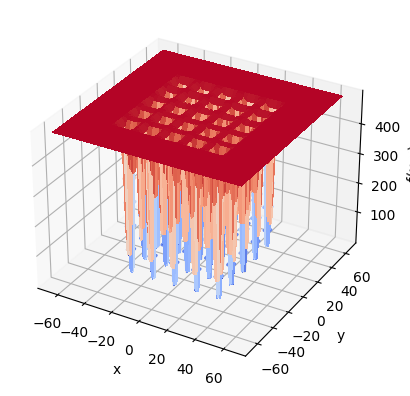

In [7]:
# Creating a DeJong object with the function number 5.
DJ5 = DeJong(5)
print(
  f"{DJ5.function_name},\nDimension (genes): {DJ5.dimension},\nRange interval: {DJ5.range},\nResolution factor: {DJ5.resolution_factor},\nNumber of bits for dimension: {DJ5.num_bits},\nNumber of bits for individual: {DJ5.num_bits * DJ5.dimension}.")
DJ5.plot()

### Gray encode and decode functions

In [8]:
print("DEC    =>    GRAY    => DEC")
# Creating an array of numbers that will be used to test the gray encoding and decoding.
elem_to_decode = 5
neg_numbers = np.arange(DJ2.range[0], DJ2.range[0] + elem_to_decode * DJ2.resolution_factor, DJ2.resolution_factor)
pos_numbers = np.arange(DJ2.range[1] - (elem_to_decode - 1) * DJ2.resolution_factor, DJ2.range[1], DJ2.resolution_factor)
numbers = np.concatenate((neg_numbers, pos_numbers))

# Printing the decimal, gray, and decimal representation of the numbers in the array `numbers`.
for i in numbers:
  gray = DJ2.gray_encode(i)
  dec = DJ2.gray_decode(gray)
  print(f" {i:.3f}  => {gray} => {dec}")

DEC    =>    GRAY    => DEC
 -2.048  => 000000000000 => -2.048
 -2.047  => 000000000001 => -2.047
 -2.046  => 000000000011 => -2.046
 -2.045  => 000000000010 => -2.045
 -2.044  => 000000000110 => -2.044
 2.044  => 100000000010 => 2.044
 2.045  => 100000000011 => 2.045
 2.046  => 100000000001 => 2.046
 2.047  => 100000000000 => 2.047
 2.048  => 1100000000000 => 2.048


In [9]:
# Creating a population of 4 individuals, each individual has 2 genes.
# DJ2 has dimension (genes) equal to 2, for this reason, population.shape[1] should be equal to DJ2.dimension=2
population = np.array([[-2.048, -2.047], [0, 0], [-1, 1], [2.047, 2.046]])

print(population)

# Evaluate a population non encoded with gray encode
print(DJ2.evaluate(population, gray_=False))

[[-2.048 -2.047]
 [ 0.     0.   ]
 [-1.     1.   ]
 [ 2.047  2.046]]
[3.90467787e+03 1.00000000e+00 4.00000000e+00 4.60859433e+02]


In [10]:
# Encoding the population with the gray code.
population_string = []
for i in range(population.shape[0]):
  new_ind = []
  for j in range(population.shape[1]):
    new_ind.append(DJ2.gray_encode(population[i][j]))
  population_string.append(new_ind)

population_gray = np.array(population_string)
print(population_gray)

# Evaluating a population encoded with gray encode
print(DJ2.evaluate(population_gray, gray_=True))

[['000000000000' '000000000001']
 ['110000000000' '110000000000']
 ['011000010100' '111000011100']
 ['100000000000' '100000000001']]
[3.90467787e+03 1.00000000e+00 4.00000000e+00 4.60859433e+02]


### Genetic Algorithm Class

In [11]:
from numpy.lib.function_base import average
import math
import copy
# It's a class that implements a genetic algorithm for the De Jong function
class GeneticAlgorithmForDJ:

  def __init__(self, dj_instance, selection_rule, elitism=True, population_array=None, population_size=20,
               mutation_rate=0.01, iterations=600):
    """
    This function initializes the genetic algorithm with the given parameters.

    :param dj_instance:      This is the instance of the De Jong model that you want to optimise.
    :param selection_rule:   The selection rule to be used. Can be either 'rank' or 'roulette'.
    :param elitism:          True or False. If True, the best individual in the population will be carried over
                             to the next generation. Defaults to False (optional), in this case only the population
                             is replaced by the new generation.
    :param population_array: Optional parameter, can contain an initial array with the population. It is a list of
                             lists, where each inner list correspond to an individual of the population.
    :param population_size:  The number of individuals in the population, defaults to 20 (optional).
    :param mutation_rate:    The probability of a gene mutating, defaults 0.01 (optional).
    :param iterations:       The number of iterations to run the algorithm for, defaults to 600 (optional).
    """

    self.dj_instance = dj_instance
    self.dimension = self.dj_instance.dimension
    self.dimension_bits = self.dj_instance.num_bits
    self.selection_rule = selection_rule
    self.population_size = population_size
    self.population_array = population_array
    self.mutation_rate = mutation_rate
    self.iterations = iterations
    self.elitism = elitism

    # Encoding functions
    self.encoding_function = np.vectorize(self.dj_instance.gray_encode)
    self.decoding_function = np.vectorize(self.dj_instance.gray_decode)

    # Statistics variables
    # ...
    self.iteration_mis = []
    self.ietarion_avg = []
    self.best_fit = 0
    self.fitnesses_averages = []
    self.objective_averages = []
    self.fitnesses_mins = []
    self.objective_mins = []
    self.fitnesses_std = []
    self.objective_std = []
    self.best_solution = None
    self.best_individual = []
    self.best_iter = 0


  def solve(self):
    """
    This function is the main of the class `GeneticAlgorithm`. It performs the main loop of the algorithm,
    and it calls the other functions of the class.
    """

    # Initialise population
    s_population = self.initialise_population()

    # Evaluate population
    s_fitnesses = self.compute_fitness(s_population)

    self.best_solution = min(self.dj_instance.evaluate(s_population, gray_=True))
    self.best_fit = max(s_fitnesses)
    self.best_individual = s_population[np.where(self.dj_instance.evaluate(s_population, gray_=True) == self.best_solution)]
    self.fitnesses_averages.append(average(s_fitnesses))
    self.objective_averages.append(average(self.dj_instance.evaluate(s_population, gray_=True)))
    self.fitnesses_mins.append(min(s_fitnesses))
    self.objective_mins.append(min(self.dj_instance.evaluate(s_population, gray_=True)))
    self.fitnesses_std.append(np.std(s_fitnesses))
    self.objective_std.append(np.std(self.dj_instance.evaluate(s_population, gray_=True)))


    for iteration in range(self.iterations):

      # Select parents
      s_parents_pairs = ga.selection(s_population, s_fitnesses)

      # Generates new individuals using reproduction rules
      s_children = ga.crossover(s_parents_pairs)
      s_mutated_children = ga.mutation(s_children)

      # Form a new population
      s_population = ga.reconstruction(s_population, s_mutated_children)

      # Evaluate population
      # ...
      s_fitnesses = self.compute_fitness(s_population)

      # Update statistics
      # ...
      if min(self.dj_instance.evaluate(s_population, gray_=True)) < self.best_solution:
        self.best_solution = min(self.dj_instance.evaluate(s_population, gray_=True))
        self.best_individual = s_population[np.argsort(self.dj_instance.evaluate(s_population, gray_=True))[0]]
        self.best_iter = iteration+1
        self.best_fit = max(s_fitnesses)
        #print(self.best_individual)

      self.fitnesses_averages.append(average(s_fitnesses))
      self.objective_averages.append(average(self.dj_instance.evaluate(s_population, gray_=True)))
      self.fitnesses_mins.append(min(s_fitnesses))
      self.objective_mins.append(min(self.dj_instance.evaluate(s_population, gray_=True)))
      self.fitnesses_std.append(np.std(s_fitnesses))
      self.objective_std.append(np.std(self.dj_instance.evaluate(s_population, gray_=True)))

  def initialise_population(self):
    """
    This function generates a random population of shape `population_size` and `dimension` with values between
    `range[0]` and `range[1]`.
    :return: The population encoded using gray code.
    """
    return self.encoding_function(np.random.uniform(self.dj_instance.range[0],self.dj_instance.range[1],(self.population_size,self.dimension)))

  def compute_fitness(self, population):
    """
    This function returns the computed fitness:
    """
    vals = self.dj_instance.evaluate(population, gray_=True)+ np.finfo(float).eps
    vals = (-vals + 1.1*max(vals))
    return vals / max(vals)

  def rank_selection(self, tfitnesses):
    """
    This function compute the individual probability of selection using rank selection rule.
    :return: The probability of each individual being selected for the next generation.
    """
    probs = np.array([1/self.population_size * (min(tfitnesses) + (max(tfitnesses) - min(tfitnesses)) * ((i)/(self.population_size-1))) for i in range(len(tfitnesses))])
    probs = probs/sum(probs)
    probs_unranked = np.zeros(len(probs))
    for i,v in enumerate(tfitnesses.argsort()):#no need to reverse here in the rank reversed
      probs_unranked[v] = probs[i]

    return probs_unranked

  def roulette_selection(self, rfitnesses):
    """
    This function compute the individual probability of selection using roulette selection rule.
    :return: The probability of each individual being selected for the next generation.
    """
    return rfitnesses/sum(rfitnesses)

  def selection(self, grayed_population, sfitnesses):
    """
    This function is used to select the parents for the next generation according to a selection rule.
    """
    # Computing the probability of each individual to be selected as parent.
    # ...
    if self.selection_rule == 'rank':
        population_probs = self.rank_selection(sfitnesses)
    elif self.selection_rule == 'roulette':
        population_probs = self.roulette_selection(sfitnesses)

    # Selecting the parents for the next generation using probabilities.
    # ...
    couples = []
    for c in range(int(self.population_size/2)):
      couples.append(grayed_population[np.random.choice([l for l in range(len(grayed_population))], 2, p = population_probs, replace=False)])
    return np.array(couples)

  def crossover(self, parents_coupled):
    """
    This function perform a single-point crossover on each paiì54321 of parents, selected by pairing the first half of
    the parents with the second half of them.
    """
    childr = []
    for p in parents_coupled:
      c1 = []
      c2 = []
      for genom in range(self.dimension):
        cross_point = np.random.randint(low=1, high=self.dimension, size=None)
        c1.append(np.array([p[0][genom][0:cross_point] + p[1][genom][cross_point:len(p[0][0])]]))
        c2.append(np.array([p[1][genom][0:cross_point] + p[0][genom][cross_point:len(p[0][0])]]))
      childr.append(np.array(c1).flatten())
      childr.append(np.array(c2).flatten())

    return np.array(childr)

  def mutation(self, children):
    """
    This function, decide if mutate or not each bit of each offspring in each child, by flip it, with a mutation
     rate, otherwise keep it the same.
    """
    children_to_mutate = children.copy()
    for i in range(len(children_to_mutate)):
      for g in range(len(children_to_mutate[i])):
        t = ''
        for bit in children_to_mutate[i][g]:
          if np.random.rand(1) >= self.mutation_rate:
            t += bit
            #print(i,g,bit)
          else:
            t += str(1 - int(bit))

        children_to_mutate[i][g] = t

    return children_to_mutate


  def elitism_selection(self, old_population, new_population):
    """
    Generating a new population as combination of the old one and the new one.
    """
    full_population = np.concatenate([old_population, new_population])
    full_fitnesses = self.compute_fitness(full_population)
    best_twenty = full_population[(-full_fitnesses).argsort()[0:self.population_size]]
    return best_twenty

  def reconstruction(self, prev_pop, new_pop):
    """
    If elitism is enabled, this function replace the population with the 20 best individuals.
    """
    if self.elitism:
      new_pop = self.elitism_selection(prev_pop, new_pop)
    return new_pop

  def update_statistics(self):
    """
    This function can be used to compute statistics on the objective value.
    """


In [12]:
ga = GeneticAlgorithmForDJ(DJ1, 'roulette')
population = ga.initialise_population()
fitnesses = ga.compute_fitness(population)
rank_probs = ga.rank_selection(fitnesses)
wheel_probs = ga.roulette_selection(fitnesses)
parents_pairs = ga.selection(population, fitnesses)
children = ga.crossover(parents_pairs)
mutated_children = ga.mutation(children)
reconstructed = ga.reconstruction(population, mutated_children)
evaluat = min(ga.dj_instance.evaluate(reconstructed, gray_=True))
fitnesses2 = ga.compute_fitness(reconstructed)
print('population', population)
print()
print('fitnesses', fitnesses)
print()
print('rank_probs', rank_probs, sum(rank_probs))
print()
print('wheel_probs', wheel_probs, sum(wheel_probs))
print()
print('parents_pairs', parents_pairs)
print()
print('children', children)
print()
print('mutated_children', mutated_children)
print()
print('reconstructed', reconstructed)
print()
print('fitnesses', min(ga.dj_instance.evaluate(population, gray_=True)))
print()
print('eval', evaluat)

population [['1010000000' '1110110011' '1100111100']
 ['0000011001' '0101110010' '0000001010']
 ['1101101100' '0000101000' '0111110100']
 ['0110110000' '0010101001' '1010010011']
 ['1010101110' '1111101001' '0010101010']
 ['0010101010' '1000000101' '1010011010']
 ['0101000111' '0000011011' '1011101101']
 ['0110101001' '1001000100' '1100100110']
 ['0101011001' '0111110110' '1010111000']
 ['1110101101' '1111110100' '1000111101']
 ['0100001100' '1110011011' '0000110010']
 ['1111110101' '1111110100' '1110100100']
 ['0110000010' '1010011001' '0000110010']
 ['1110110011' '0101101110' '0011111110']
 ['1011100100' '1110111011' '0000111011']
 ['0111100101' '1110101110' '0001100101']
 ['1010011010' '0101101110' '0011010011']
 ['1000010111' '1001100000' '1000010001']
 ['0010000110' '0010011000' '0111000000']
 ['0000001111' '0101101101' '1101100101']]

fitnesses [0.9671922  0.3595057  0.7591524  0.79624868 0.80248704 0.48201574
 0.57309575 0.83672903 0.94308832 0.69569357 0.70417492 1.
 0.57519454

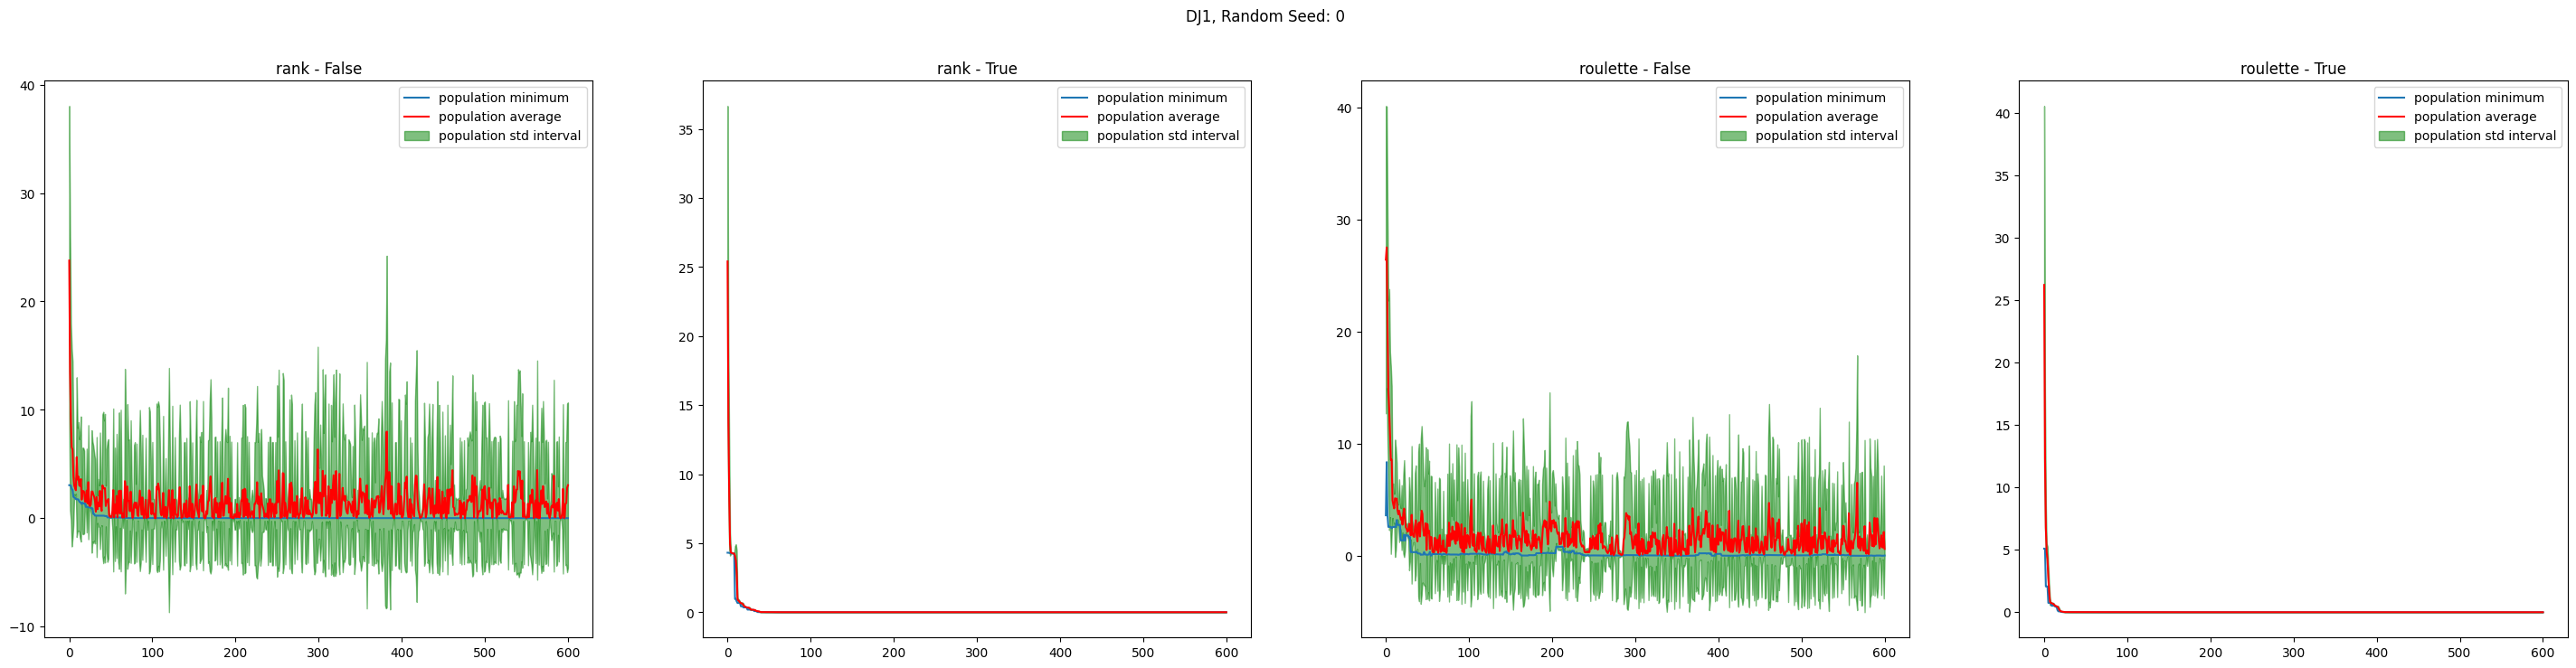

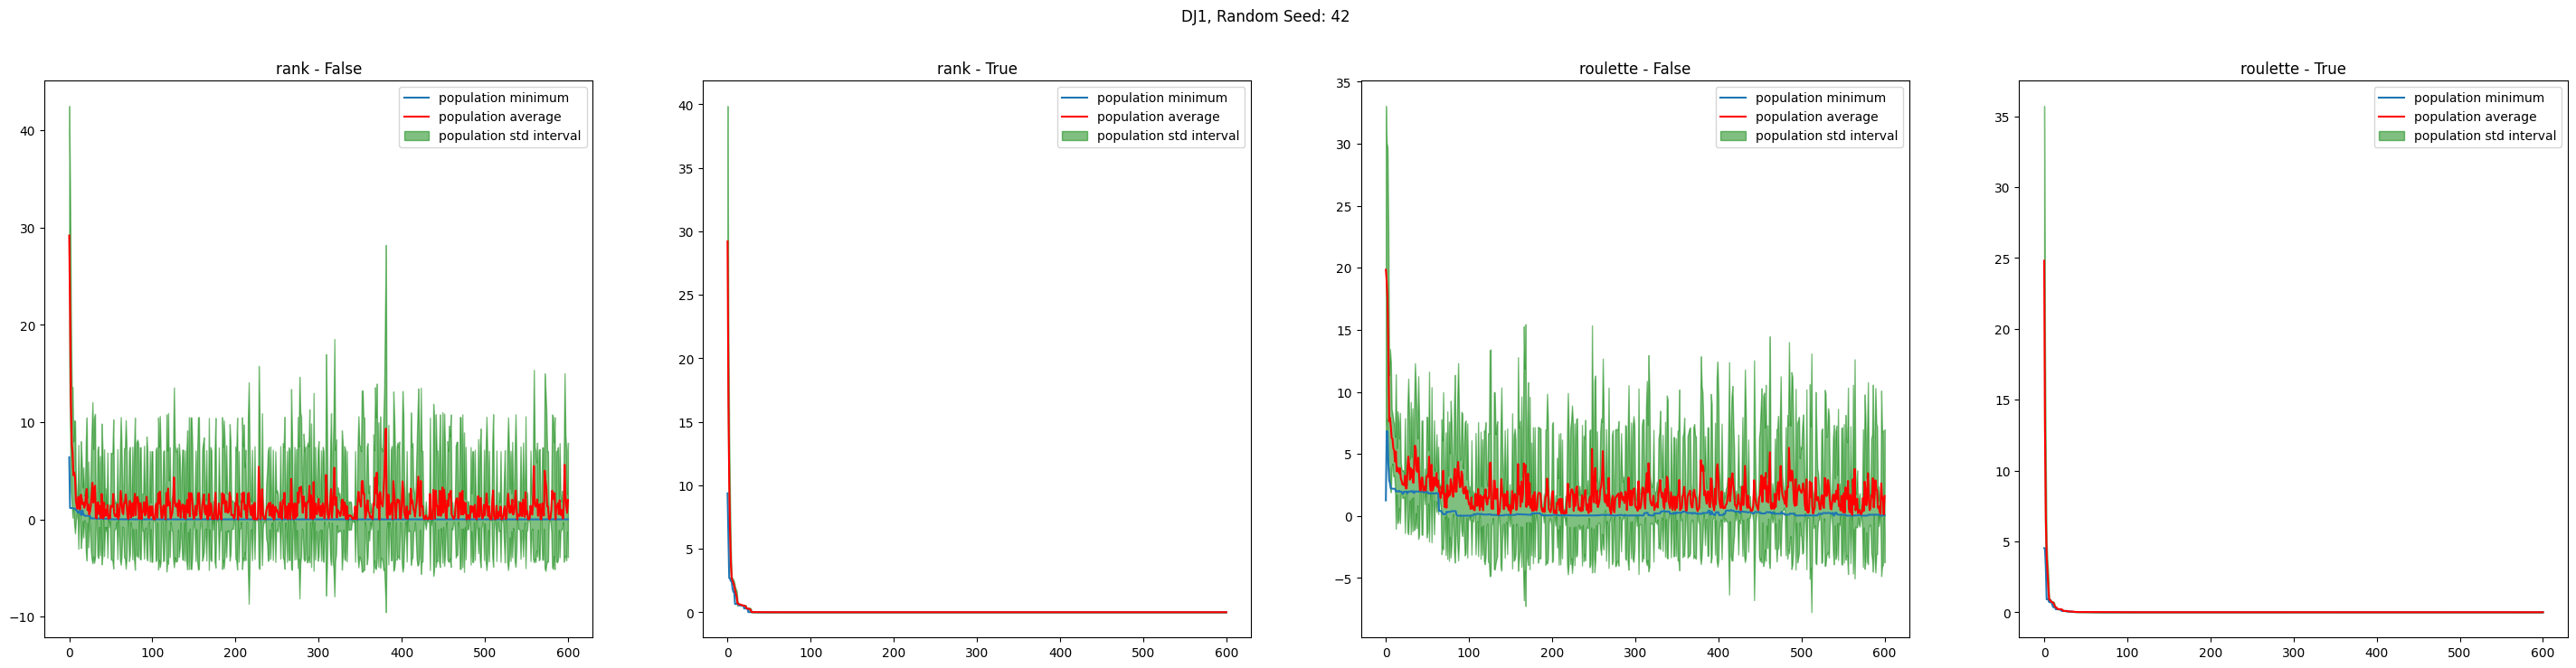

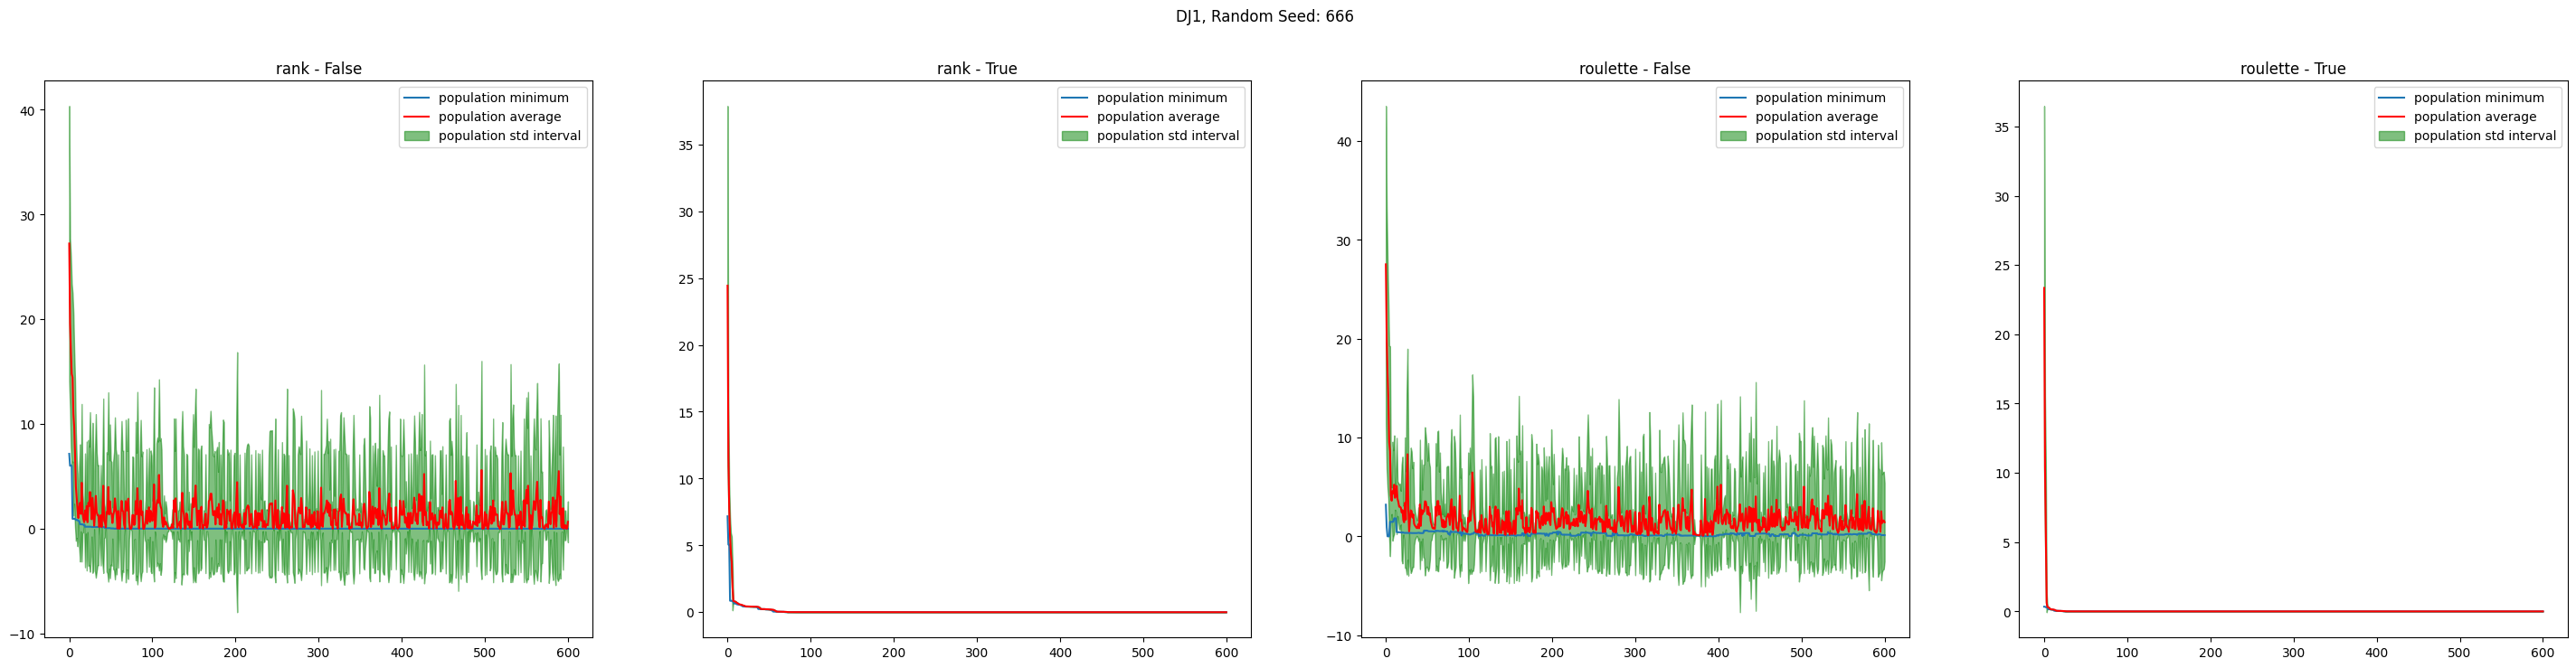

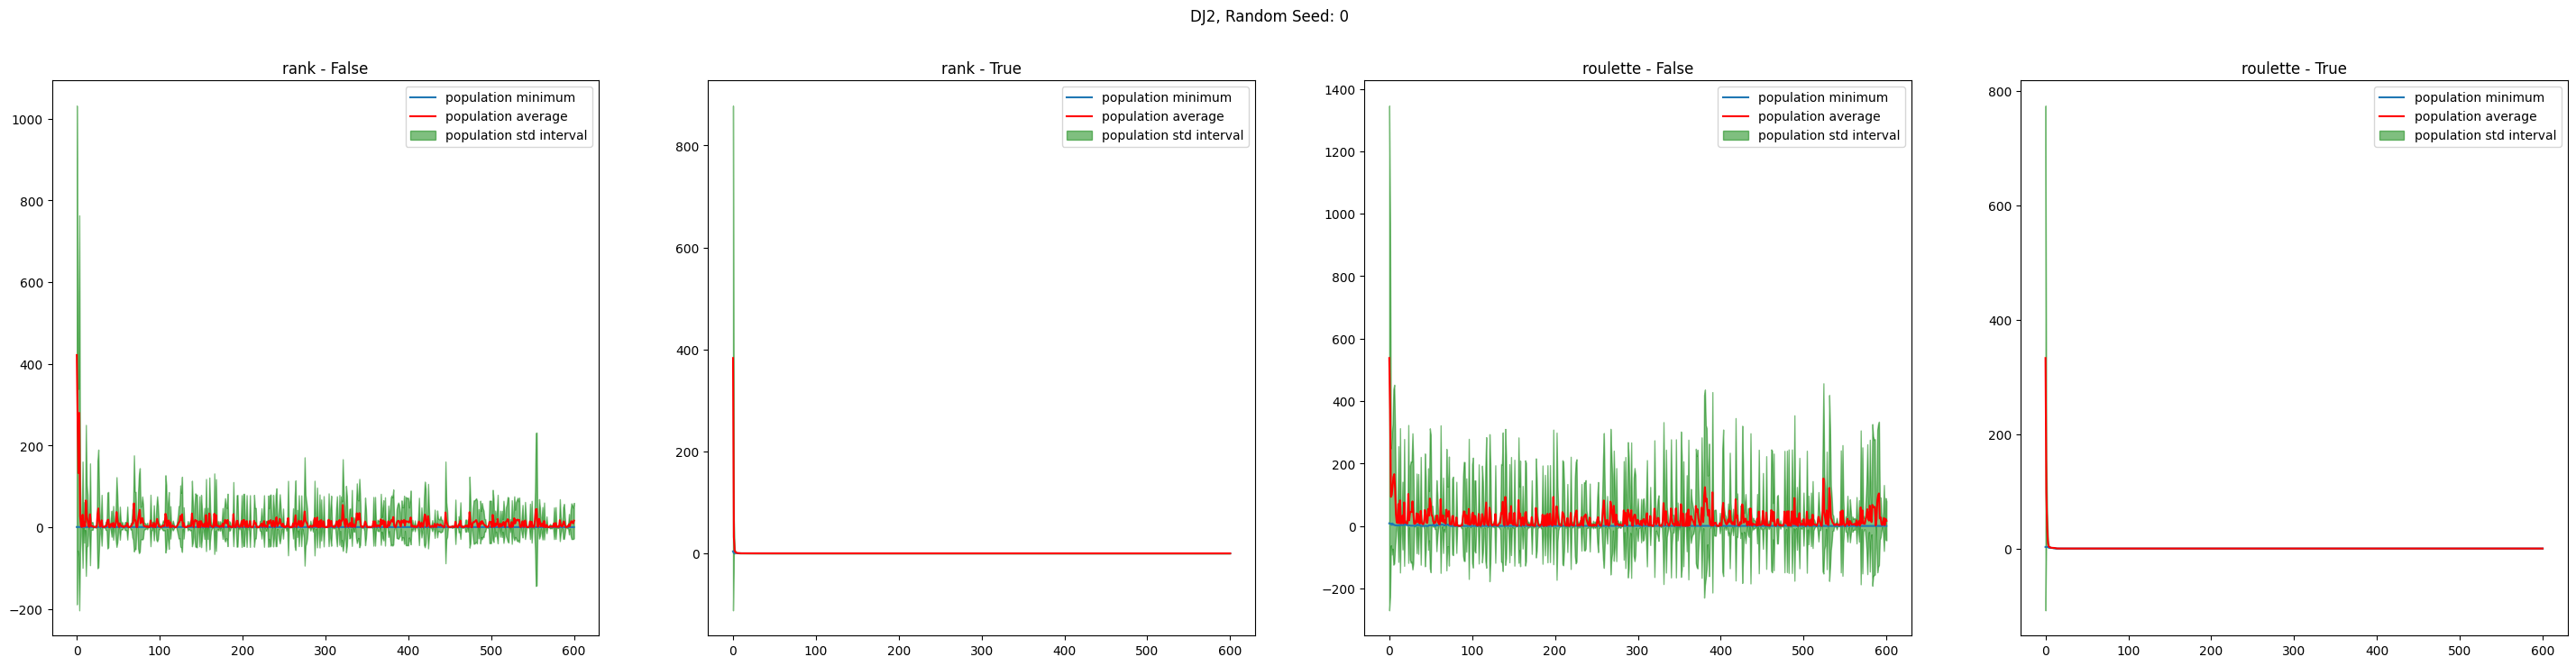

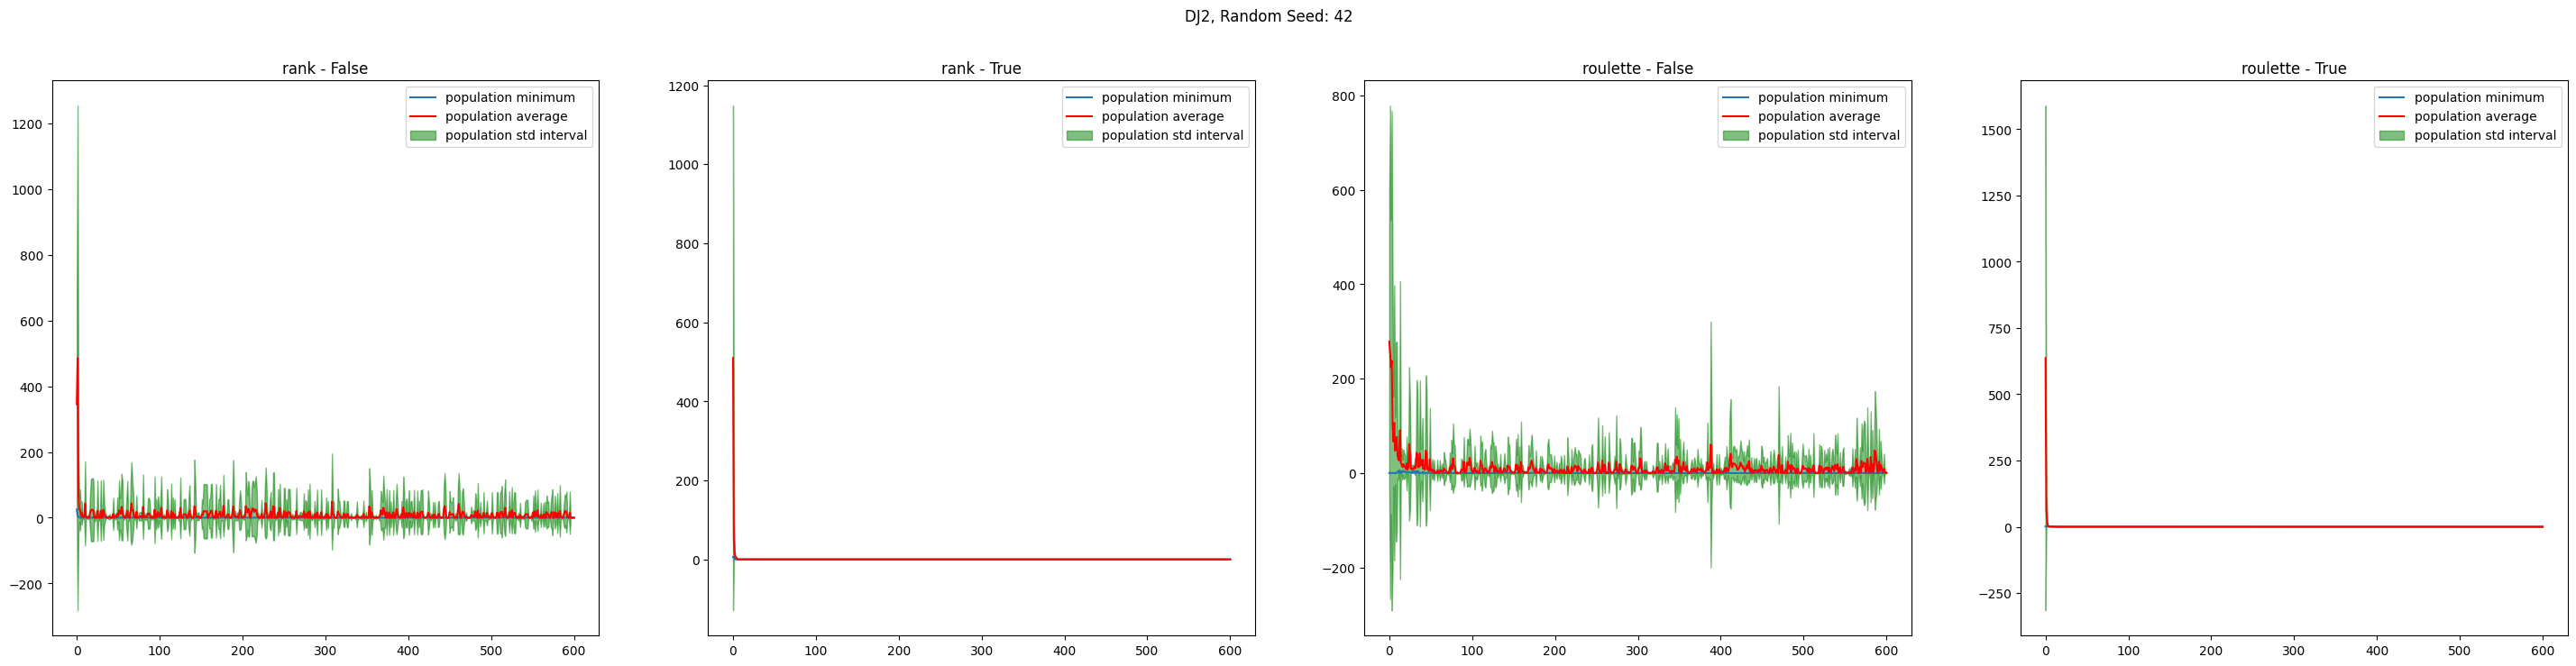

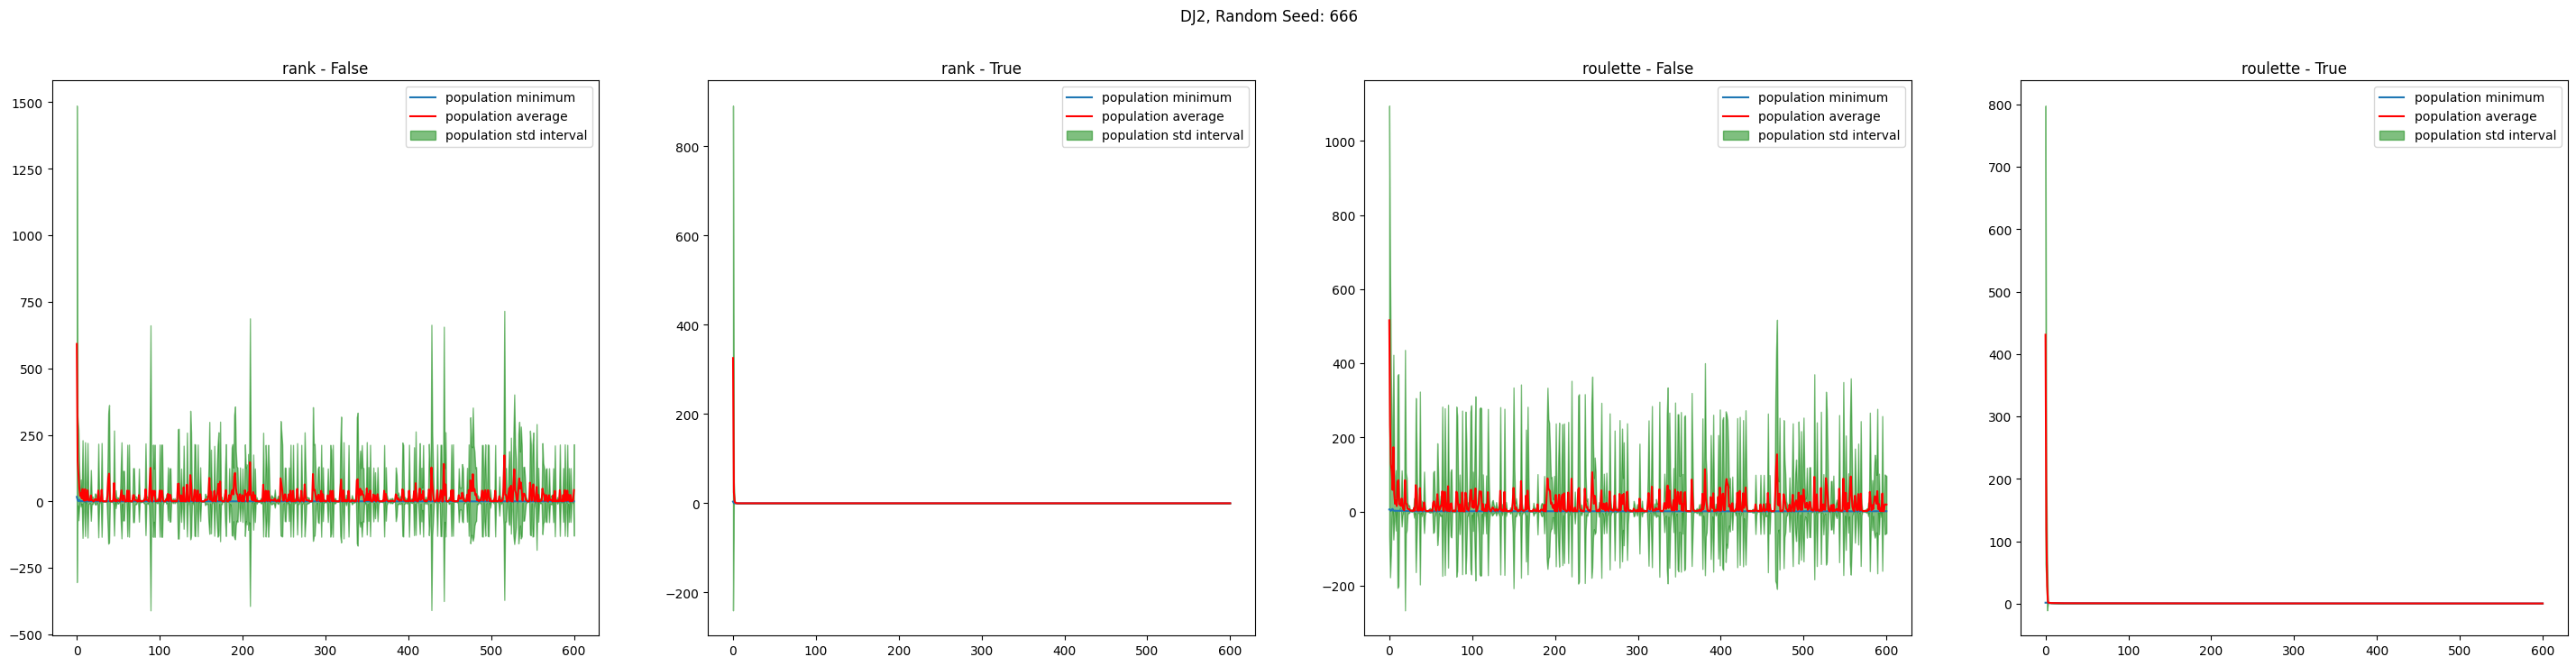

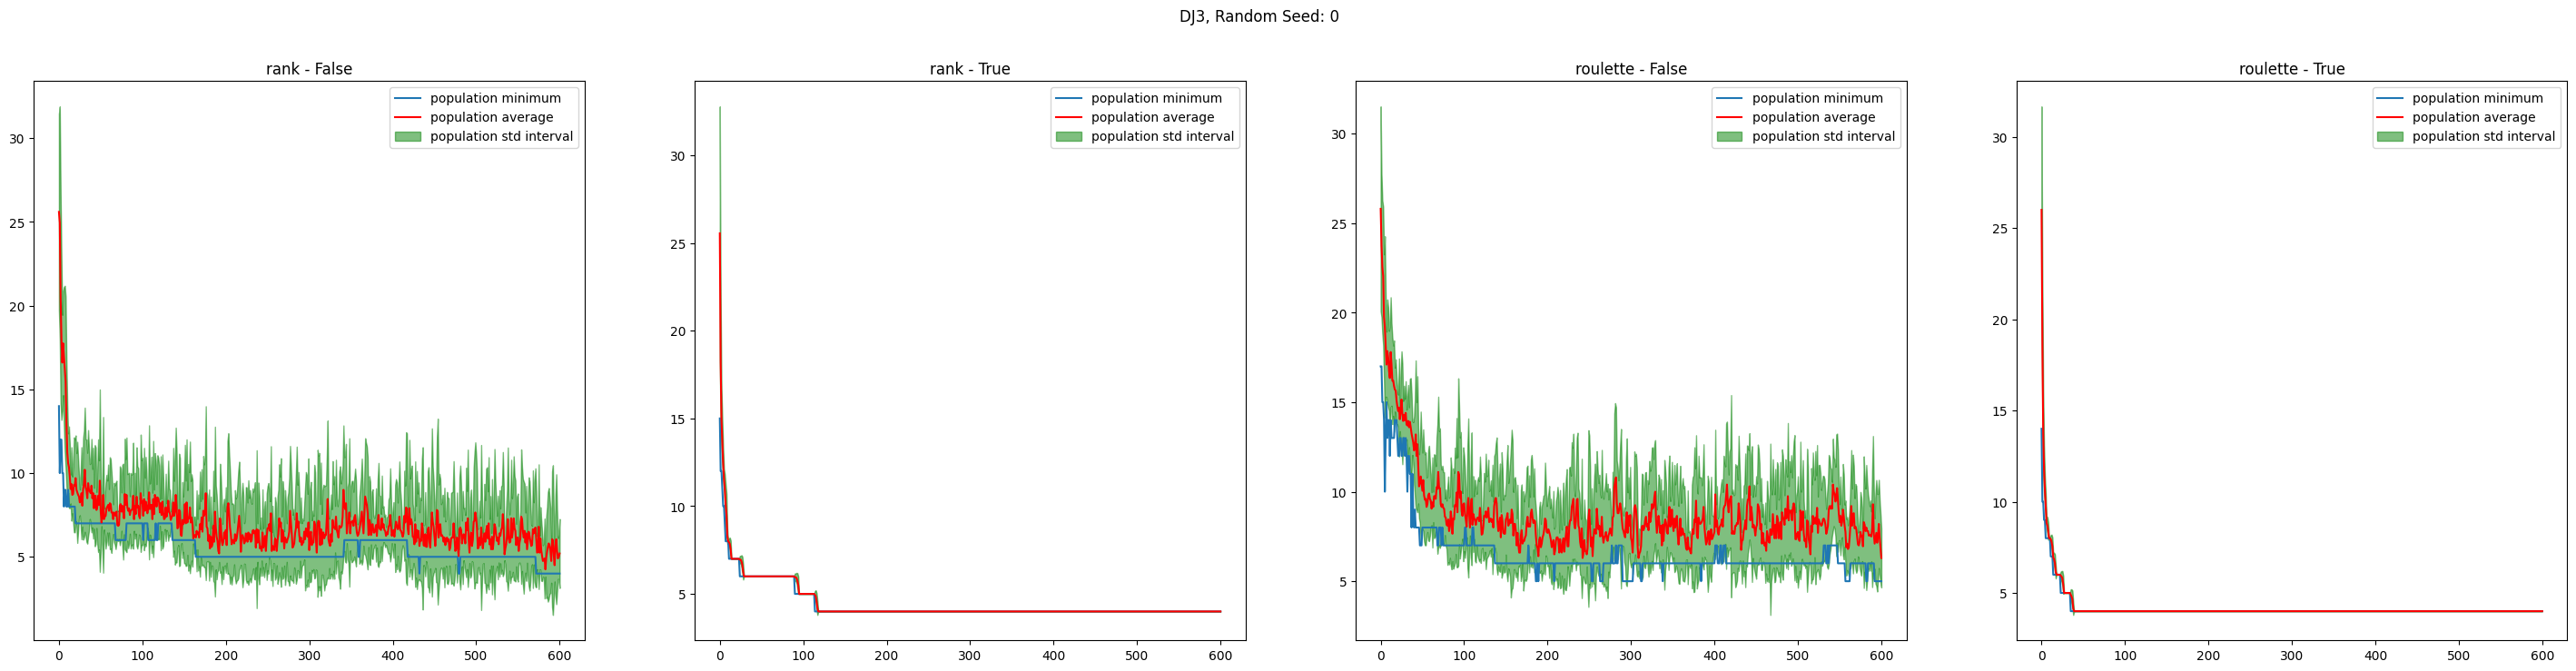

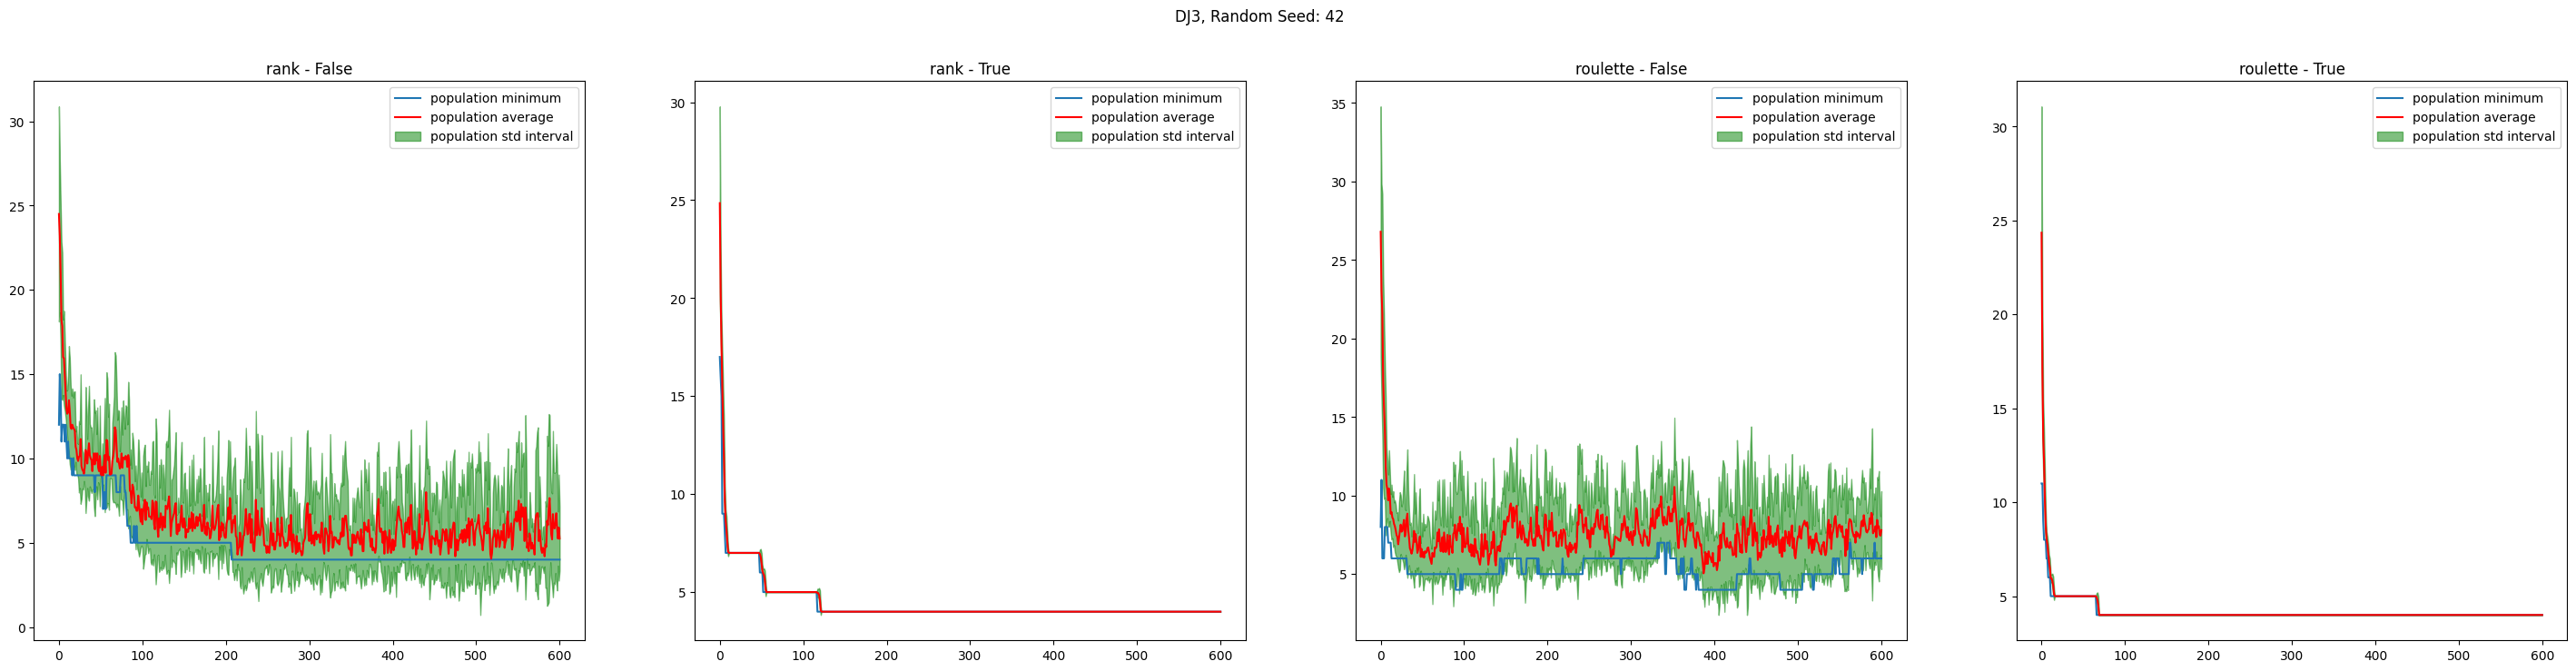

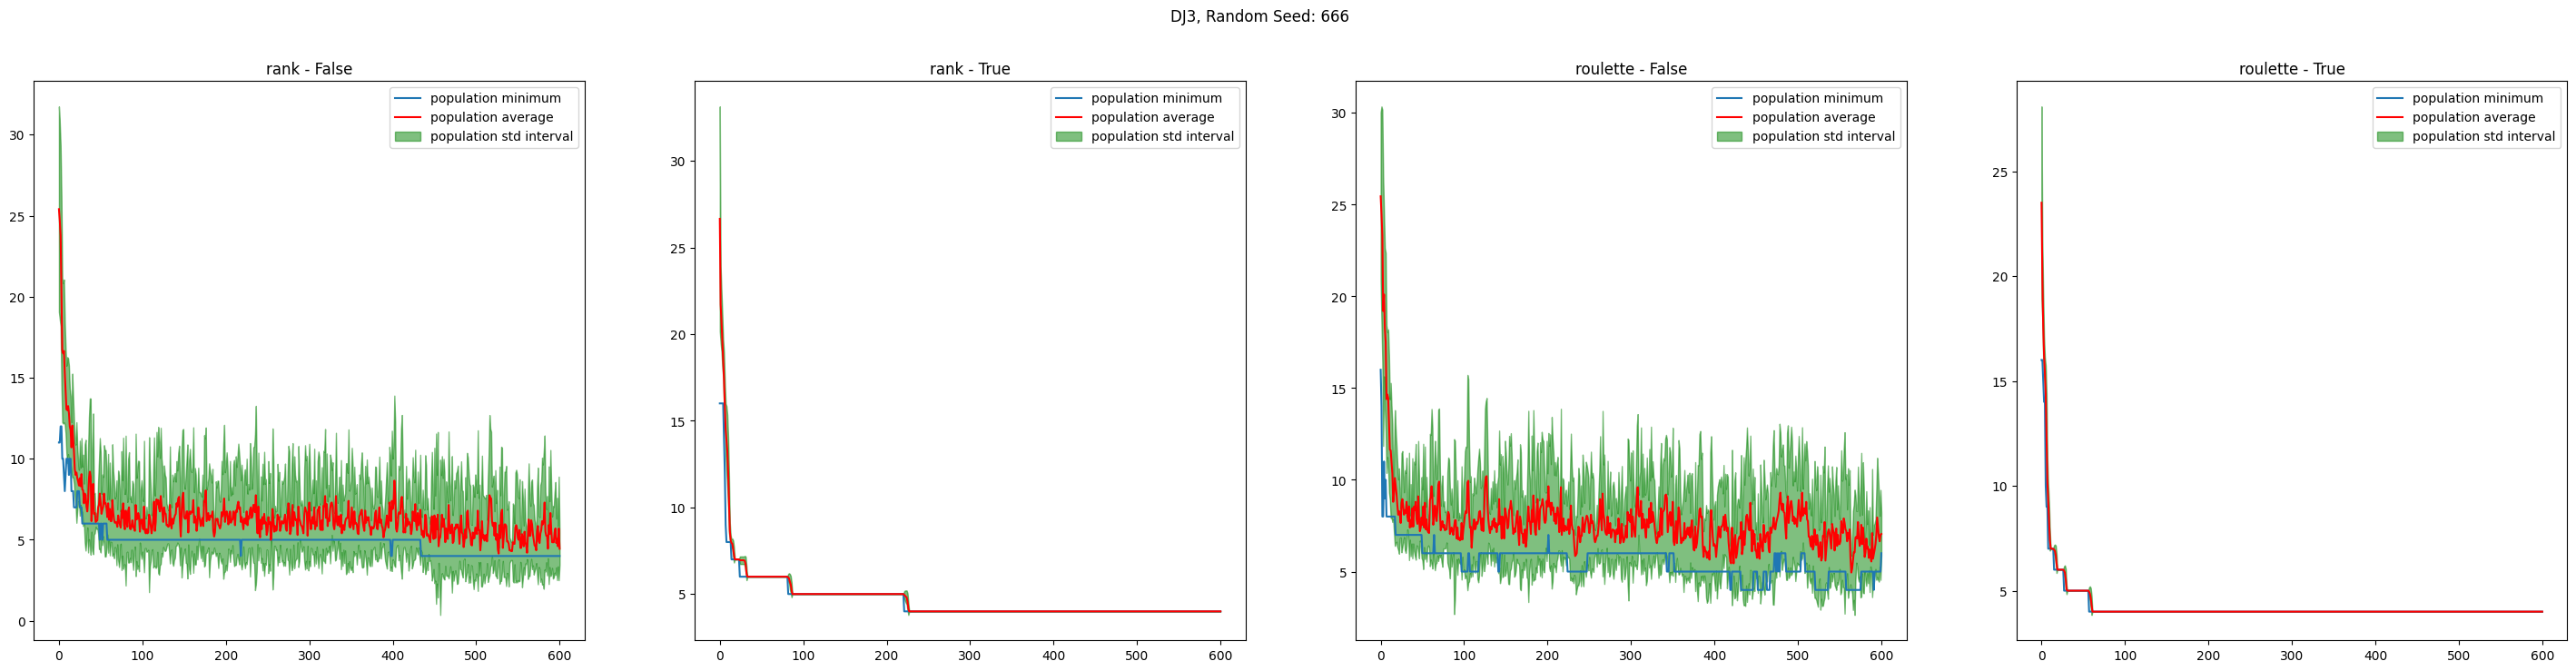

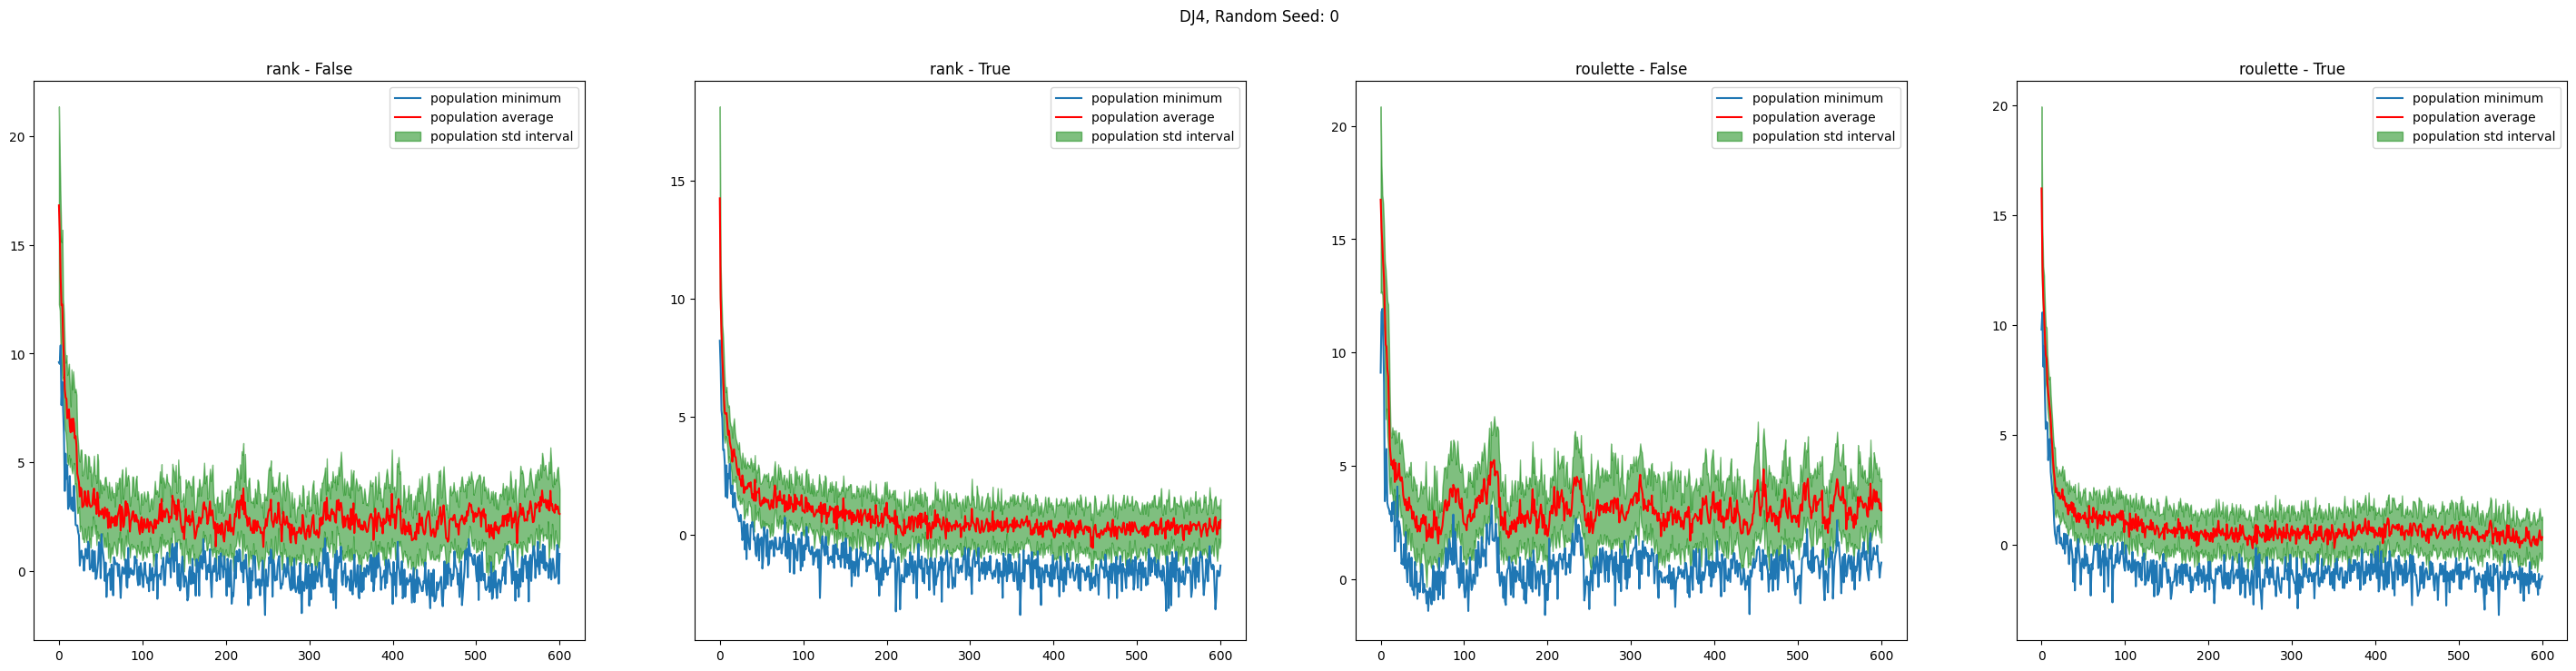

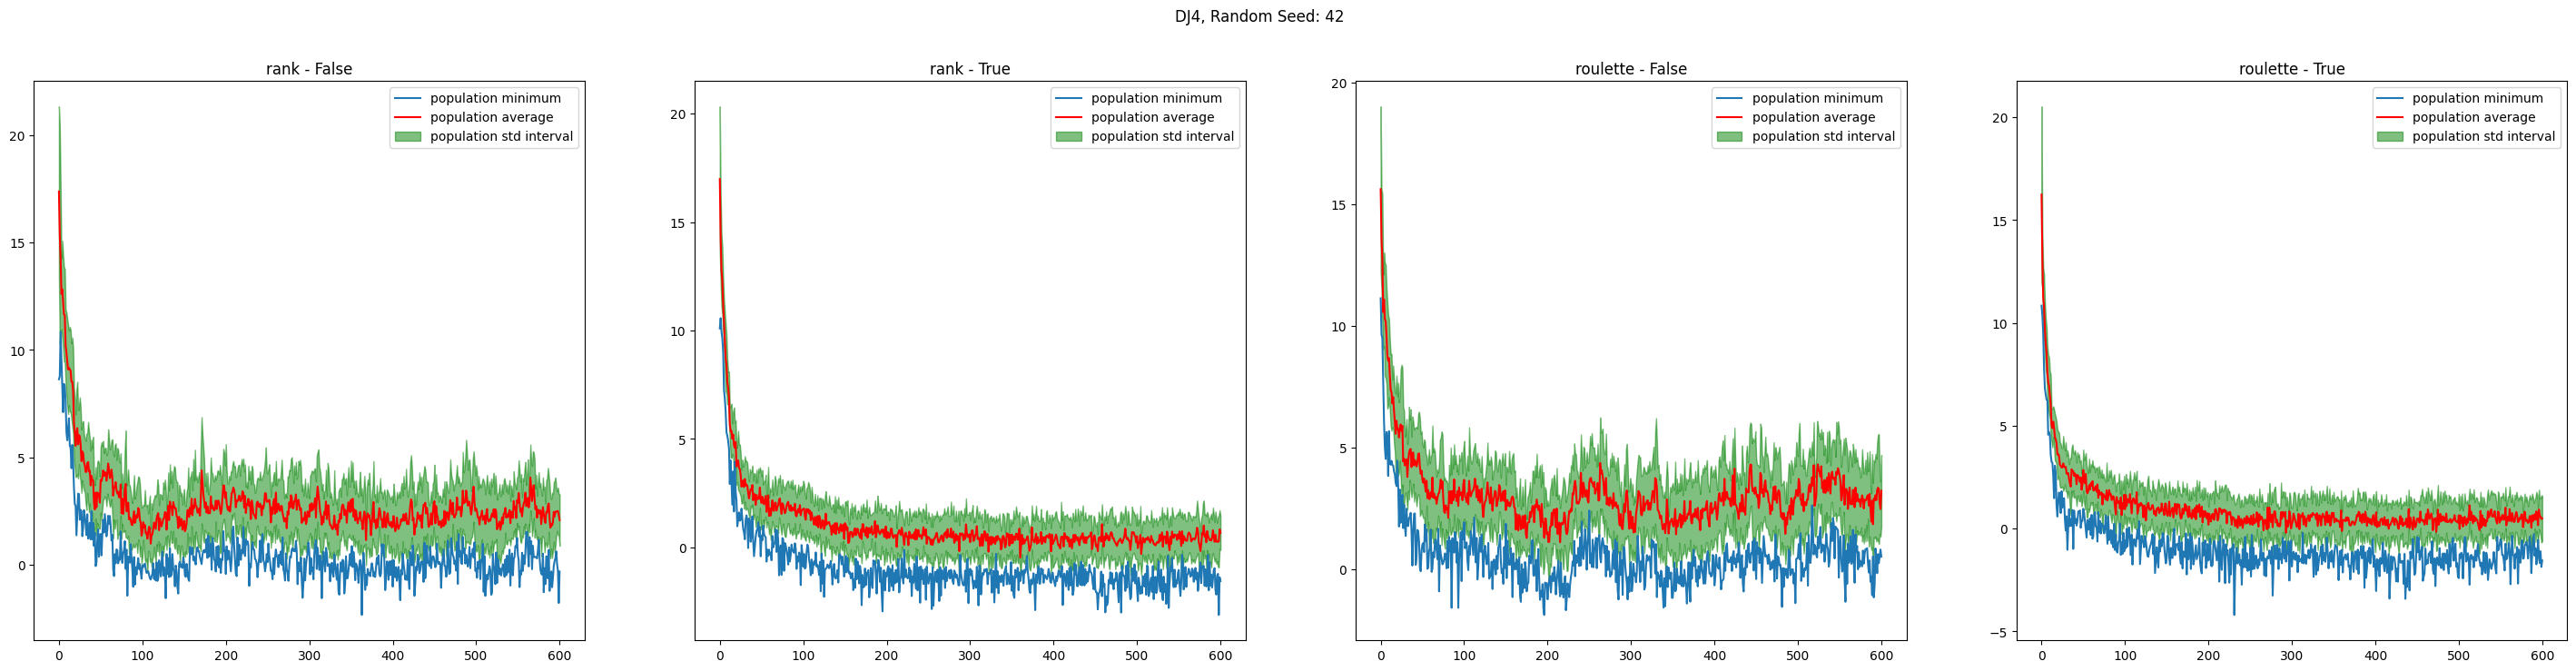

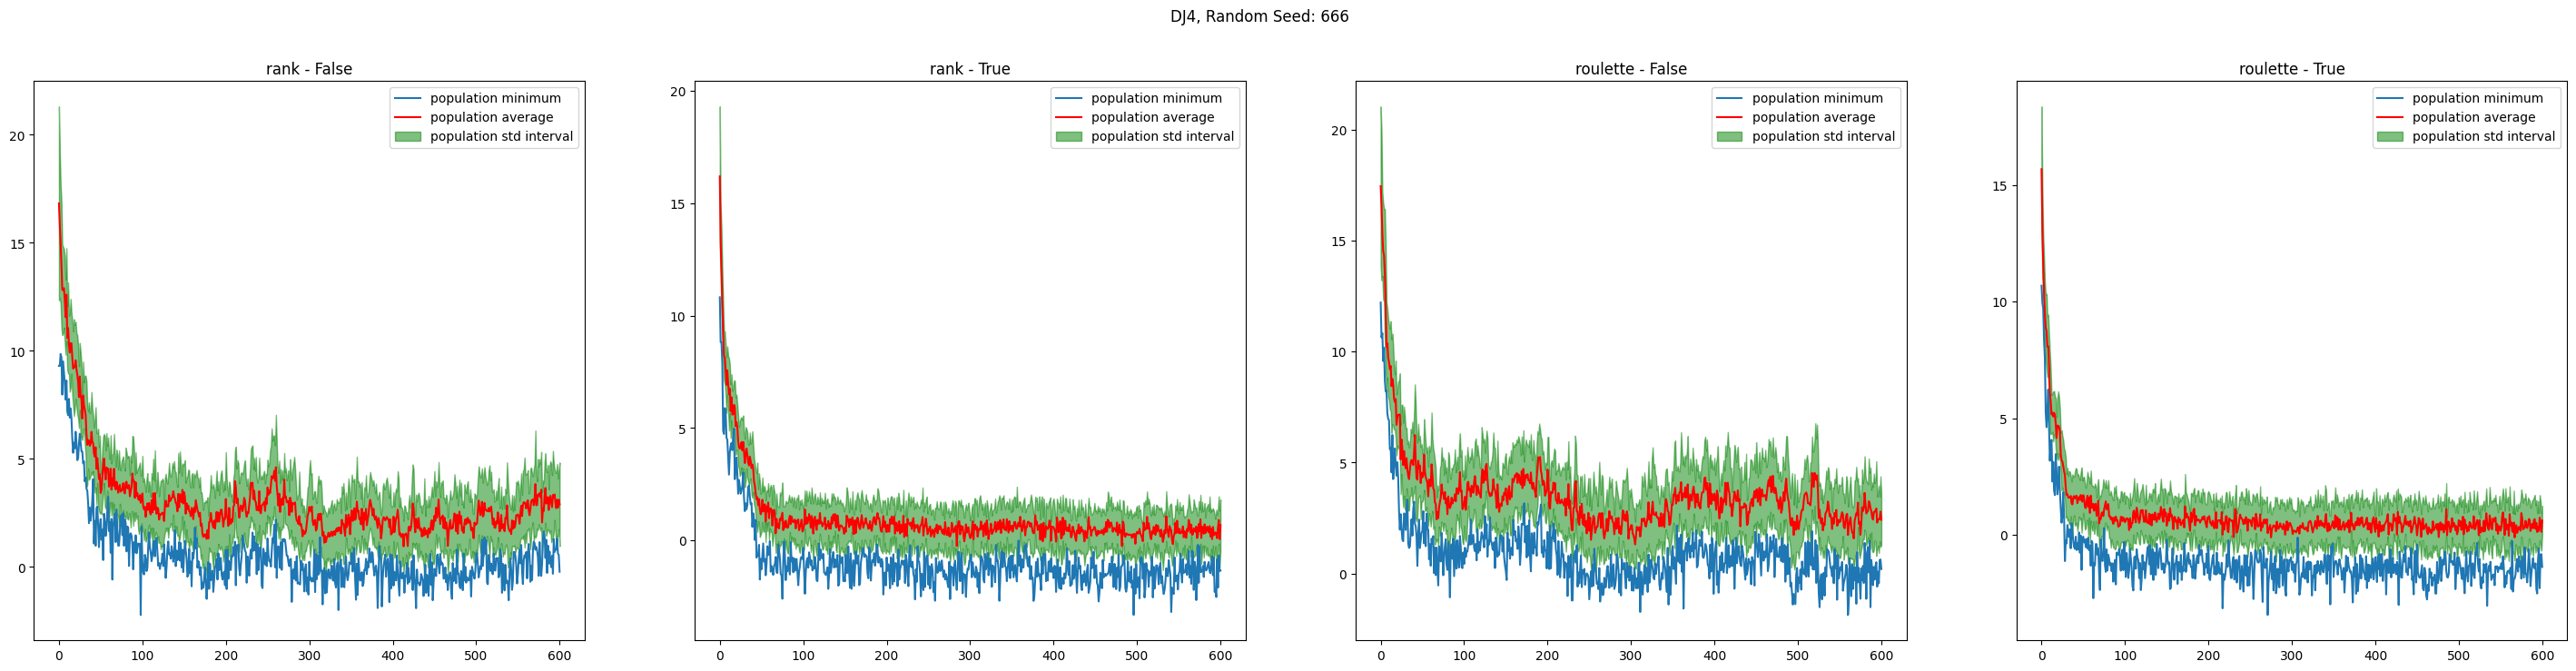

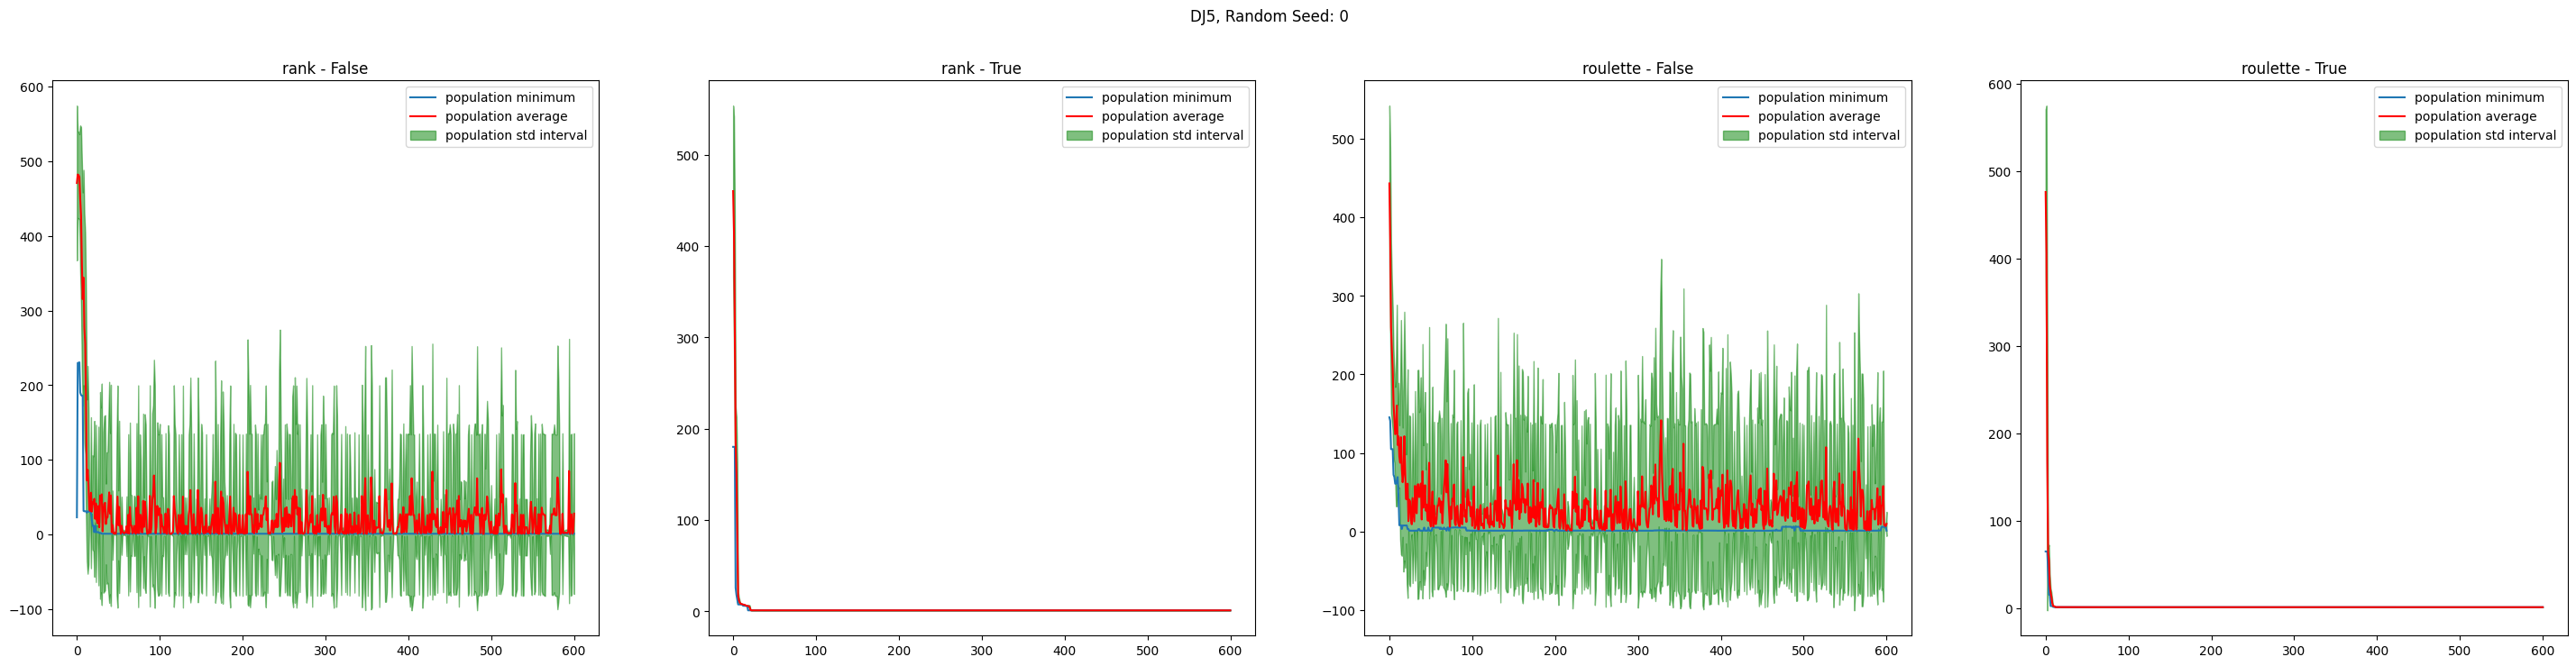

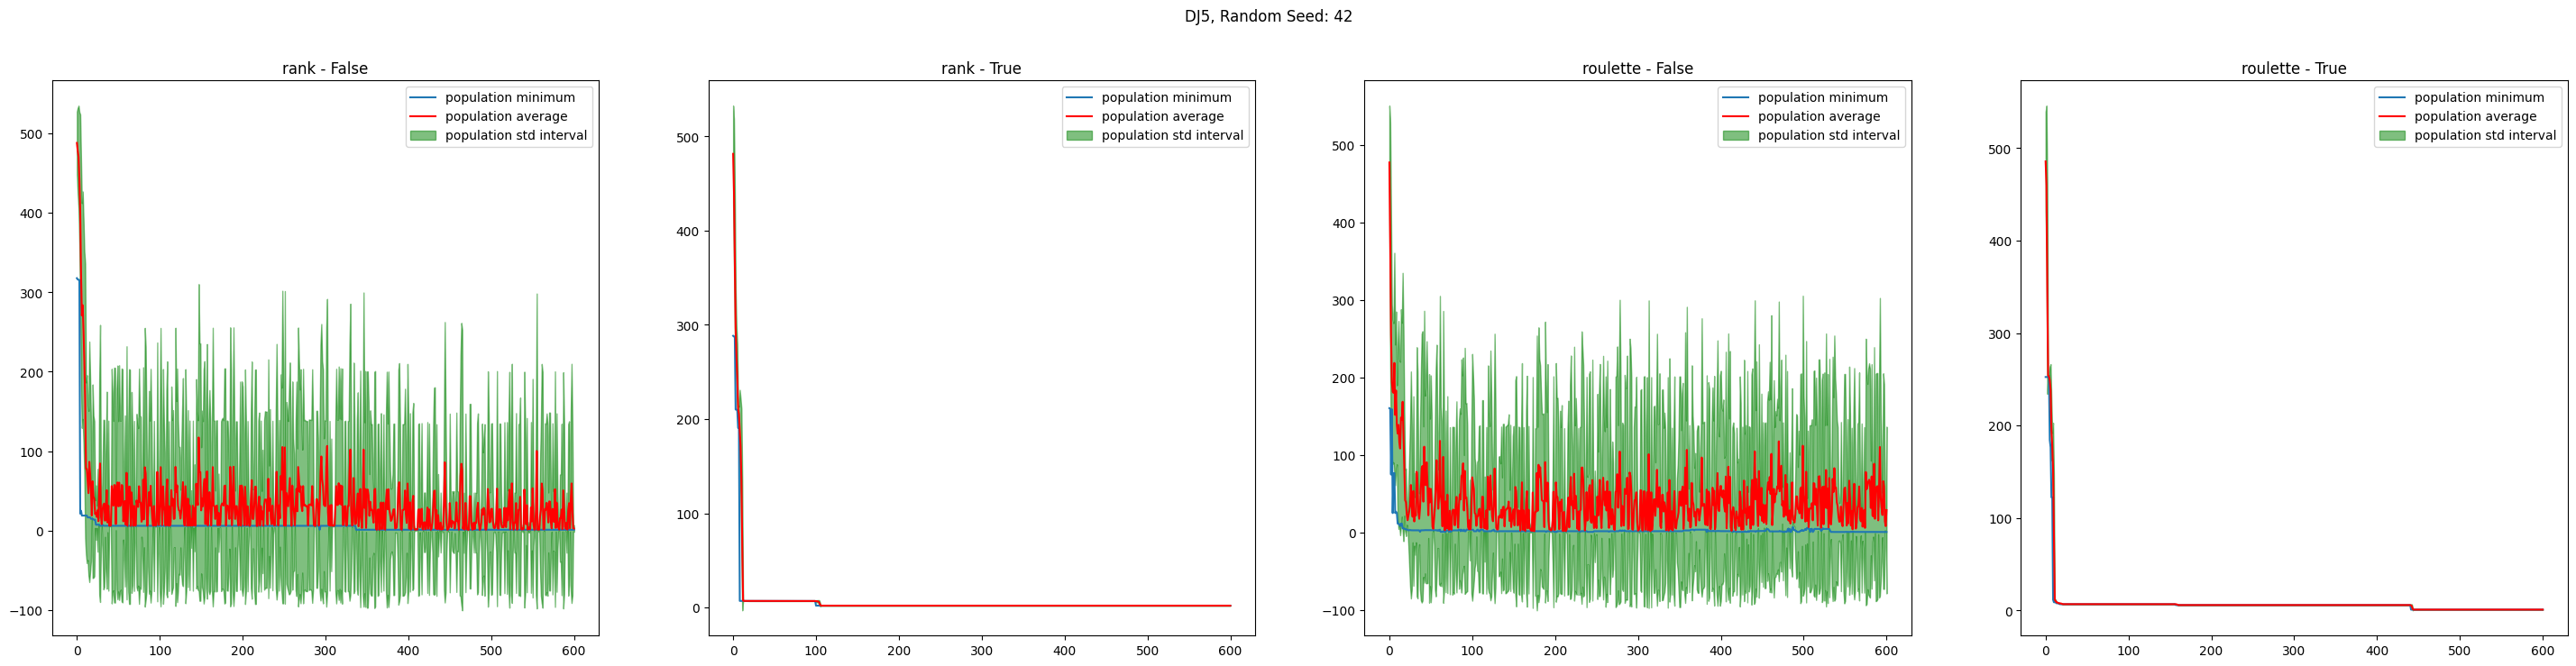

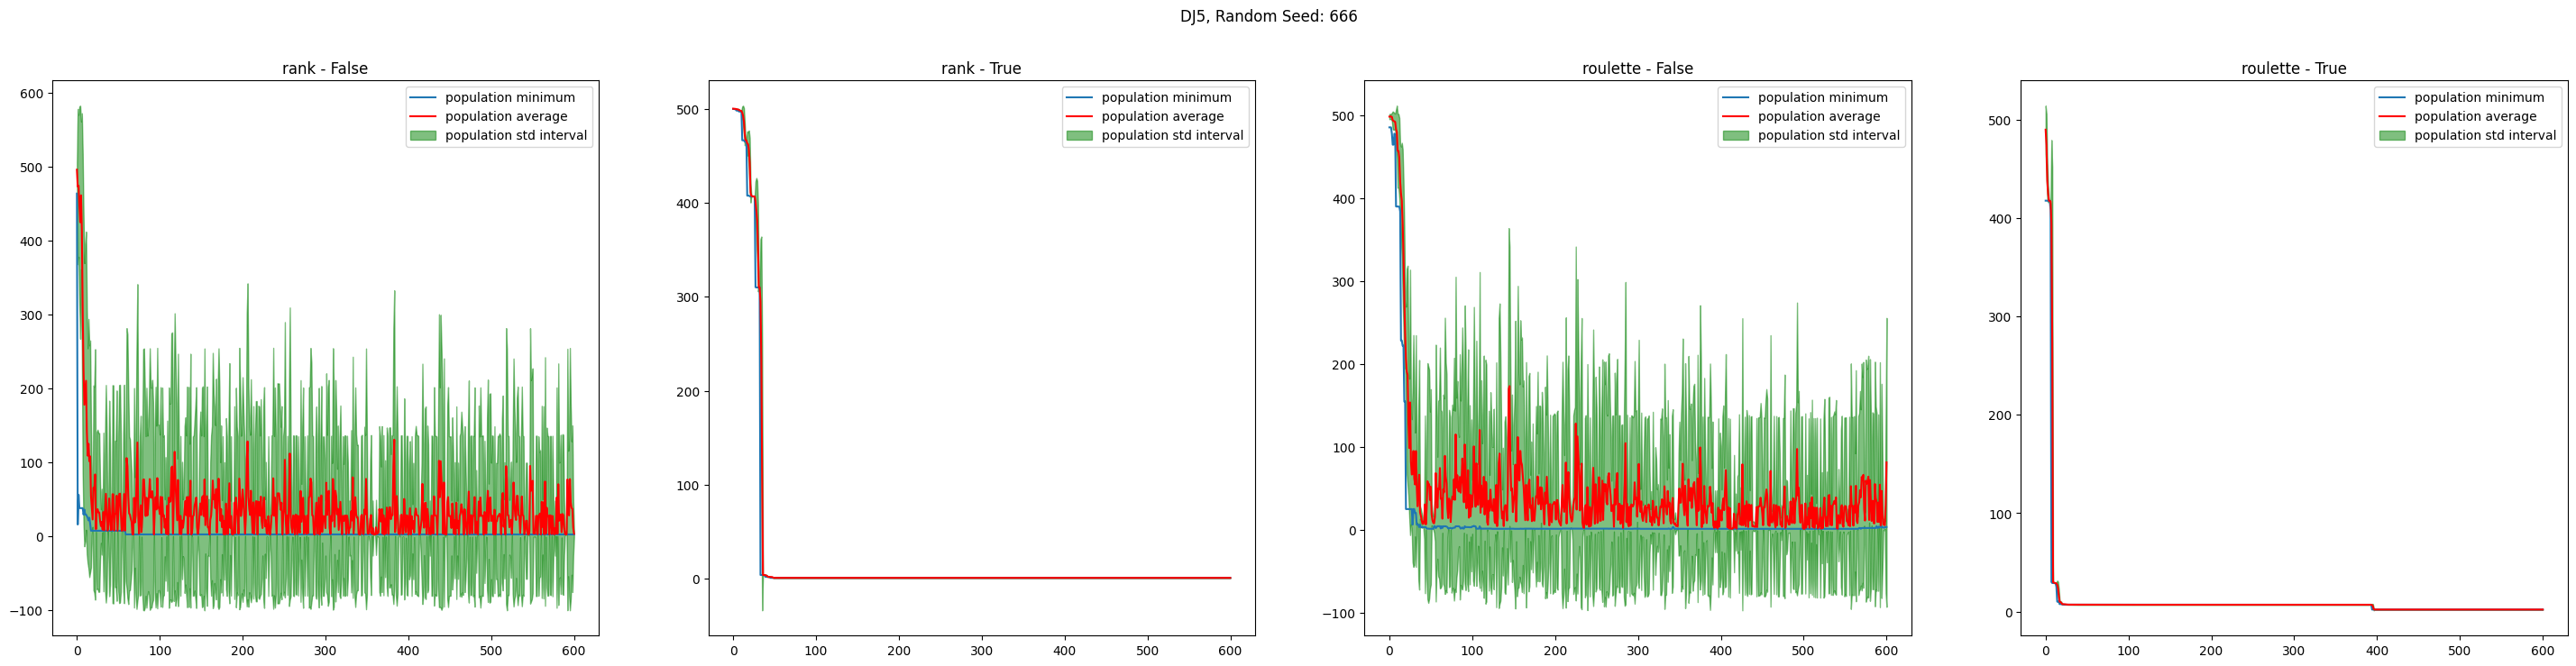

In [13]:
methods = ['rank', 'rank + elitism', 'roulette', 'roulette + elitism']
selection_rules = ['rank', 'roulette']
bool_elitism = [False, True]
seeds = [0, 42, 666]
functions = [[DeJong(1), 'DJ1'], [DeJong(2), 'DJ2'], [DeJong(3), 'DJ3'], [DeJong(4), 'DJ4'], [DeJong(5), 'DJ5']]

c_labels = ['Function', 'Method', 'Seed', 'Best solution', 'Best fitness value', 'Best iteration', 'Best individual']
data = []


for de_jong in functions:
  for seed in seeds:
    np.random.seed(seed)
    fig, axes = plt.subplots(nrows=1, ncols=len(methods), figsize=(36, 8))
    fig.suptitle(f'{de_jong[1]}, Random Seed: {seed}')
    c = -1
    for i_selection_rule in selection_rules:
      for e in bool_elitism:
        c += 1
        ga = GeneticAlgorithmForDJ(de_jong[0], i_selection_rule, elitism=e)
        ga.solve()
        axes[c].set_title(str(i_selection_rule) + ' - ' + str(e))
        axes[c].plot(ga.objective_mins, label='population minimum')
        axes[c].plot(ga.objective_averages, label='population average', color='red')
        #plot the std interval
        axes[c].fill_between([i for i in range(601)],
                             np.subtract(np.array(ga.objective_averages),np.array(ga.objective_std)),
                             np.add(np.array(ga.objective_averages),np.array(ga.objective_std)),
                             label='population std interval', color='green', alpha=0.5)
        axes[c].legend(loc="upper right")

        #['Function', 'Method', 'Seed', 'Best solution', 'Best fitness value', 'Best iteration']
        data.append([de_jong[1], str(i_selection_rule) + ' + ' + str(e) , seed, ga.best_solution, ga.best_fit, ga.best_iter, ga.best_individual])

    plt.show()

df = pd.DataFrame(data, columns=c_labels)


In [14]:
#I maximize the fitness to minimize the function, so my best fitness is the highest
df

Function            Method  Seed  Best solution  Best fitness value  \
0       DJ1      rank + False     0       0.000000                 1.0   
1       DJ1       rank + True     0       0.000000                 1.0   
2       DJ1  roulette + False     0       0.001800                 1.0   
3       DJ1   roulette + True     0       0.000000                 1.0   
4       DJ1      rank + False    42       0.000000                 1.0   
5       DJ1       rank + True    42       0.000000                 1.0   
6       DJ1  roulette + False    42       0.007400                 1.0   
7       DJ1   roulette + True    42       0.000000                 1.0   
8       DJ1      rank + False   666       0.000000                 1.0   
9       DJ1       rank + True   666       0.000000                 1.0   
10      DJ1  roulette + False   666       0.006500                 1.0   
11      DJ1   roulette + True   666       0.000000                 1.0   
12      DJ2      rank + False     0       0.090637                 1.0   
13      DJ2       rank + True     0       0.108299                 1.0   
14      DJ2  roulette + False     0       0.018515                 1.0   
15      DJ2   roulette + True     0       0.099858                 1.0   
16      DJ2      rank + False    42       0.146974                 1.0   
17      DJ2       rank + True    42       0.157624                 1.0   
18      DJ2  roulette + False    42       0.027735                 1.0   
19      DJ2   roulette + True    42       0.146699                 1.0   
20      DJ2      rank + False   666       0.033929                 1.0   
21      DJ2       rank + True   666       0.002713                 1.0   
22      DJ2  roulette + False   666       0.257656                 1.0   
23      DJ2   roulette + True   666       0.194106                 1.0   
24      DJ3      rank + False     0       4.000000                 1.0   
25      DJ3       rank + True     0       4.000000                 1.0   
26      DJ3  roulette + False     0       5.000000                 1.0   
27      DJ3   roulette + True     0       4.000000                 1.0   
28      DJ3      rank + False    42       4.000000                 1.0   
29      DJ3       rank + True    42       4.000000                 1.0   
30      DJ3  roulette + False    42       4.000000                 1.0   
31      DJ3   roulette + True    42       4.000000                 1.0   
32      DJ3      rank + False   666       4.000000                 1.0   
33      DJ3       rank + True   666       4.000000                 1.0   
34      DJ3  roulette + False   666       4.000000                 1.0   
35      DJ3   roulette + True   666       4.000000                 1.0   
36      DJ4      rank + False     0      -0.574467                 1.0   
37      DJ4       rank + True     0      -2.971896                 1.0   
38      DJ4  roulette + False     0      -1.443773                 1.0   
39      DJ4   roulette + True     0      -2.312816                 1.0   
40      DJ4      rank + False    42      -1.989343                 1.0   
41      DJ4       rank + True    42      -2.769786                 1.0   
42      DJ4  roulette + False    42      -2.500957                 1.0   
43      DJ4   roulette + True    42      -2.791873                 1.0   
44      DJ4      rank + False   666       1.035093                 1.0   
45      DJ4       rank + True   666      -2.732833                 1.0   
46      DJ4  roulette + False   666      -0.374218                 1.0   
47      DJ4   roulette + True   666      -2.041827                 1.0   
48      DJ5      rank + False     0       0.998004                 1.0   
49      DJ5       rank + True     0       0.998004                 1.0   
50      DJ5  roulette + False     0       0.998004                 1.0   
51      DJ5   roulette + True     0       0.998004                 1.0   
52      DJ5      rank + False    42       0.998004                 1.0   
53     

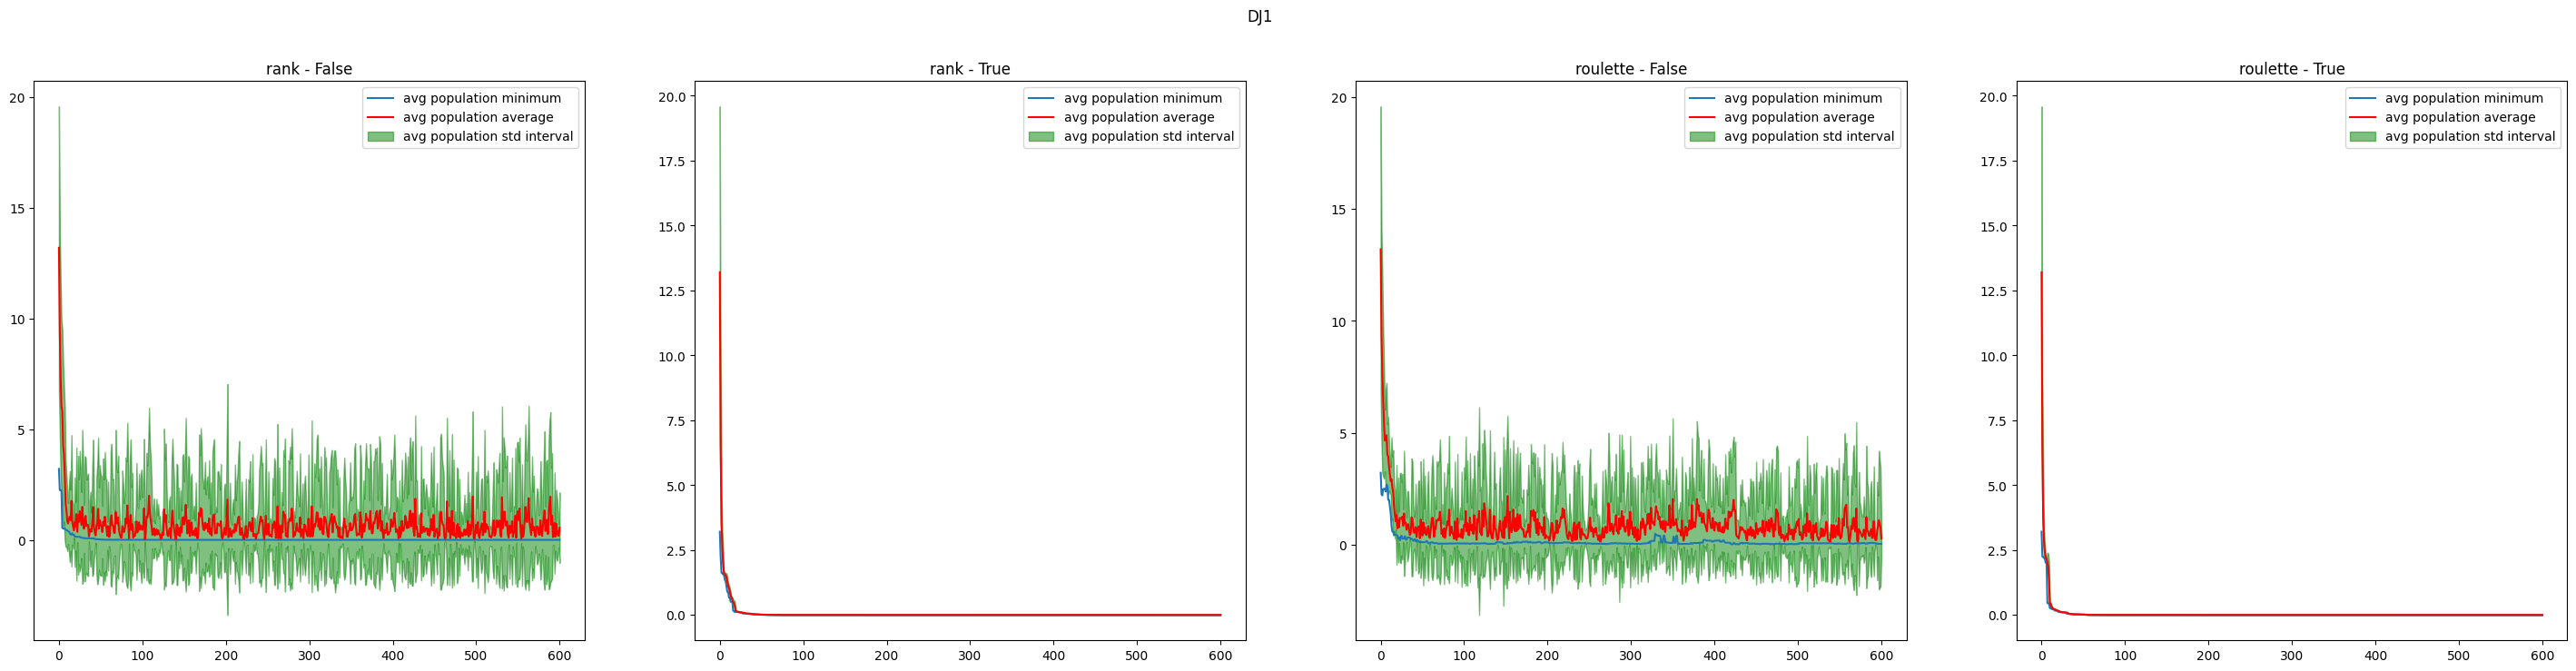

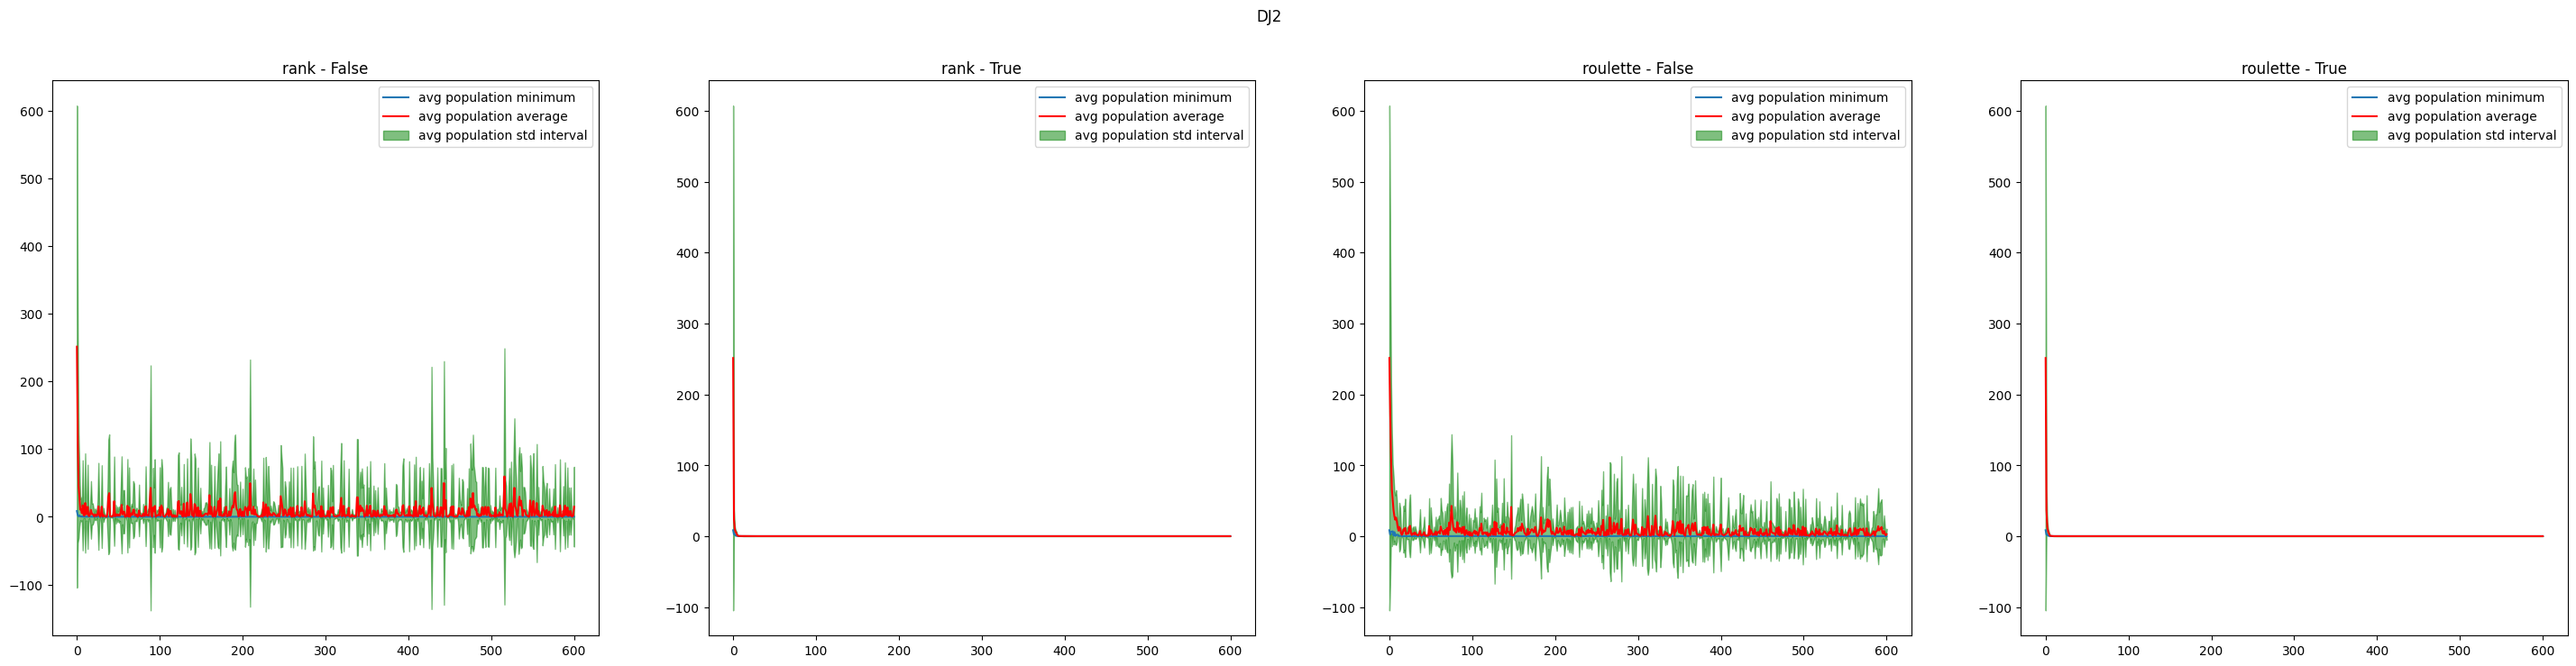

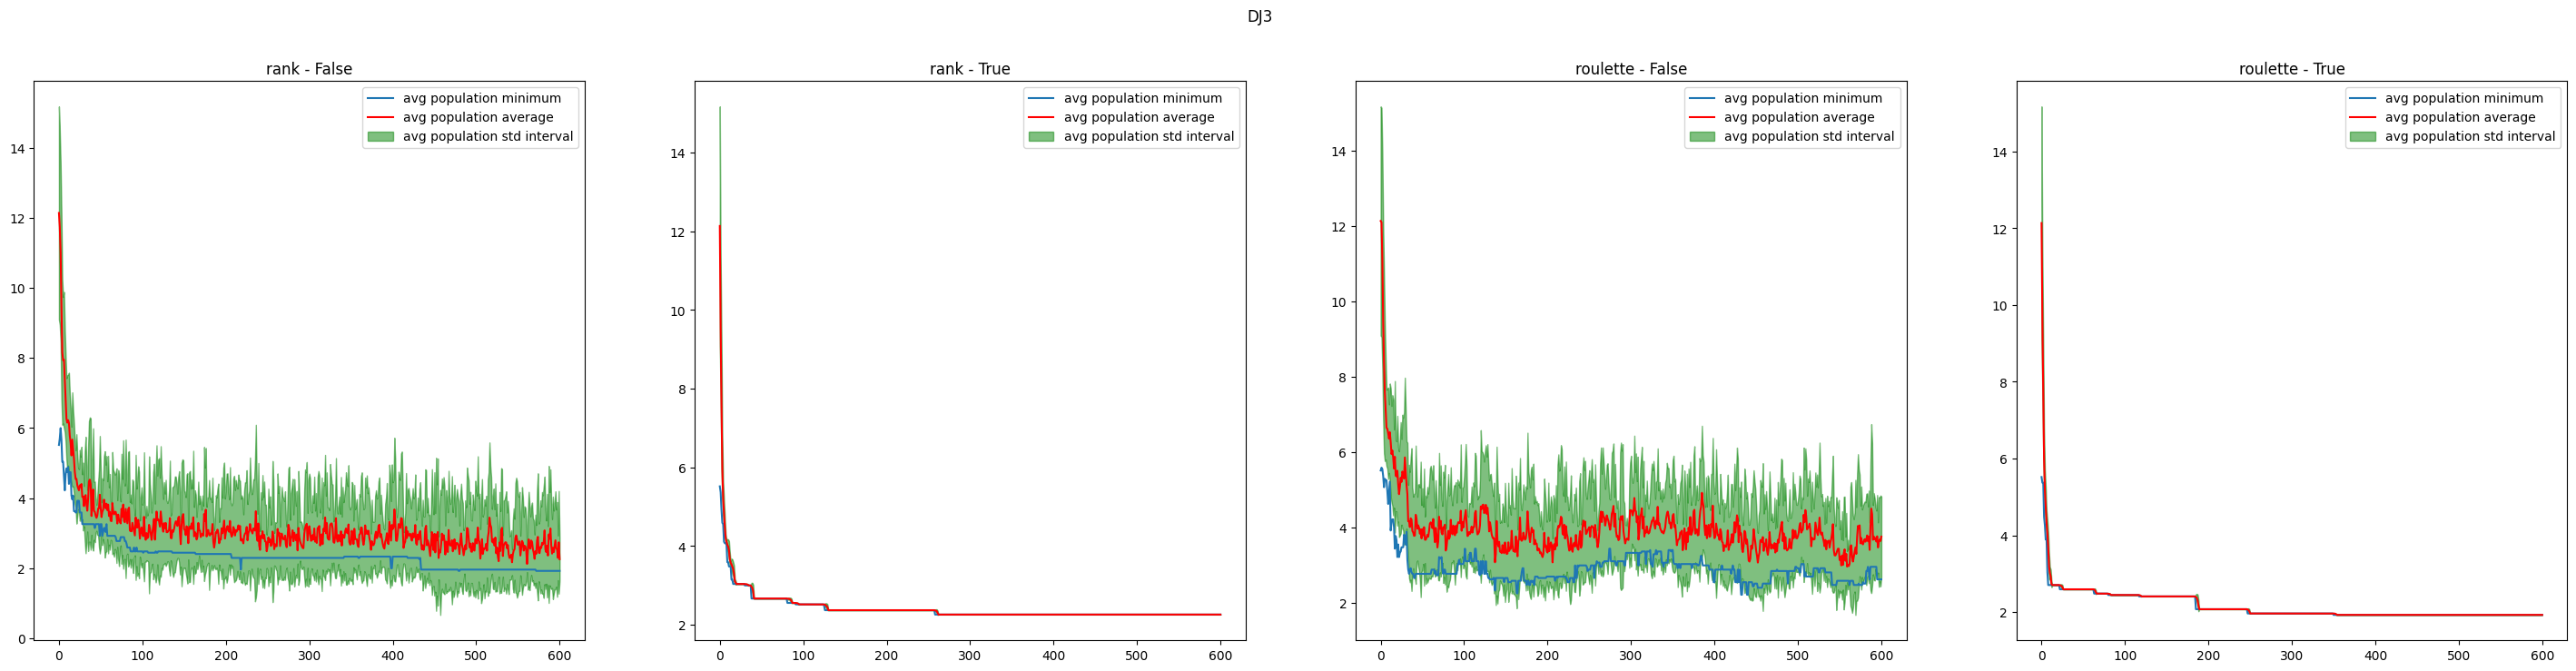

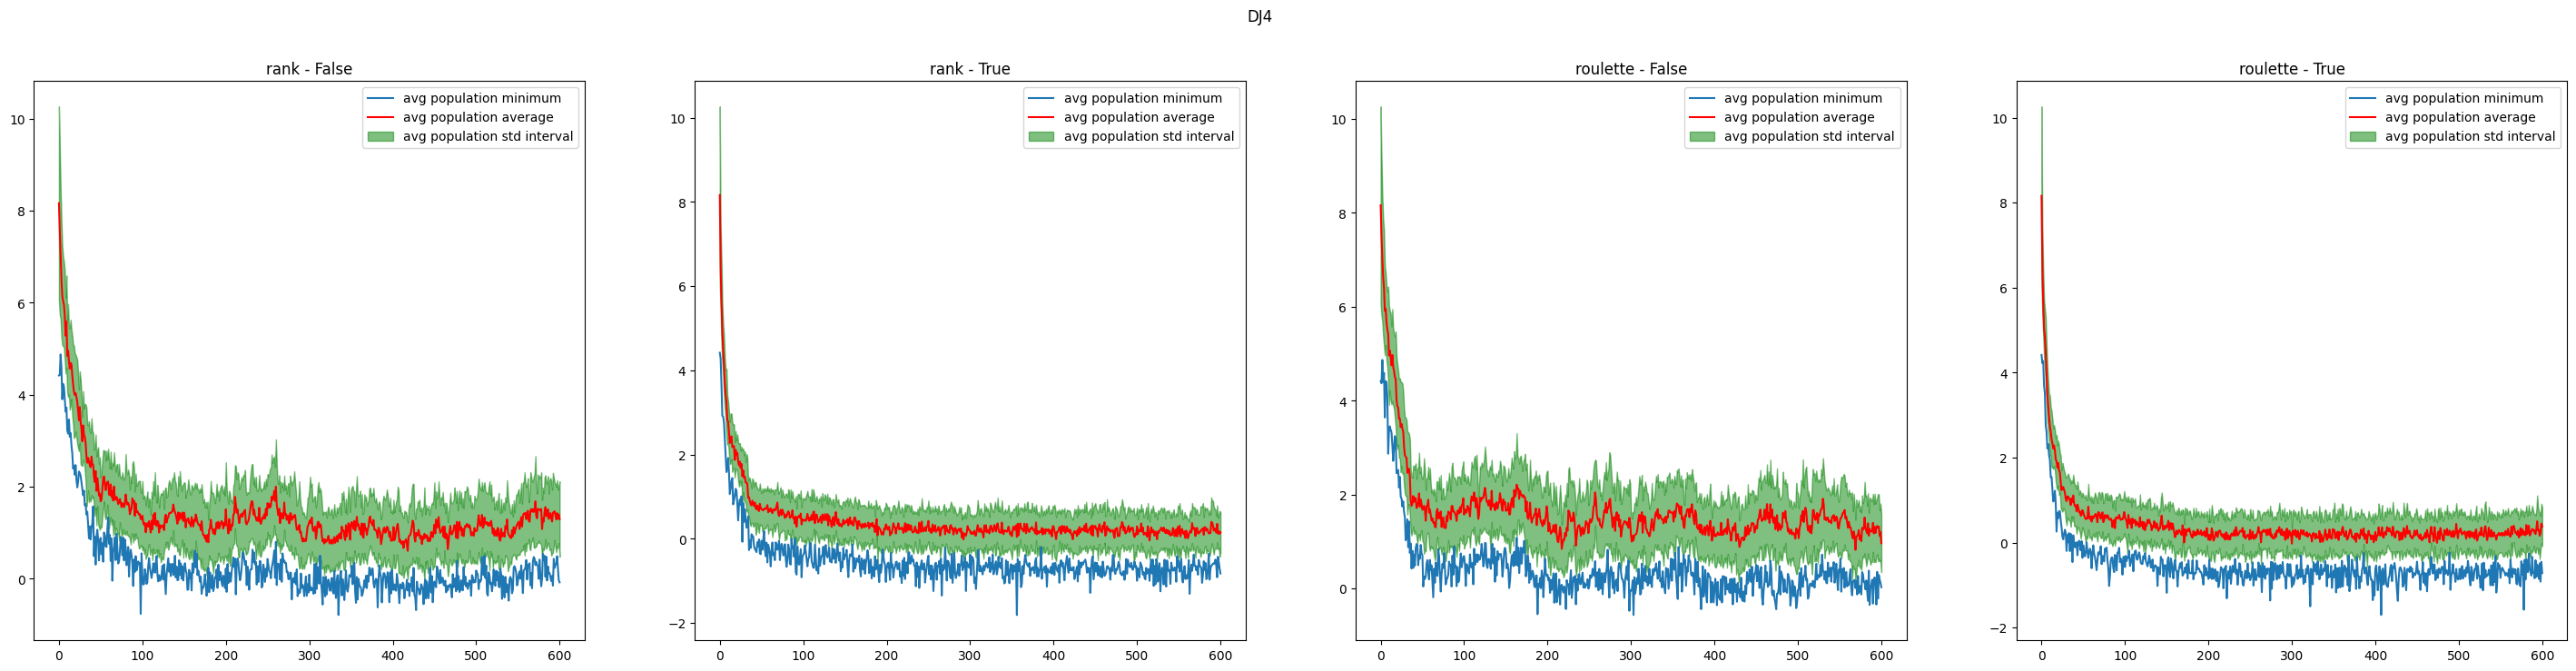

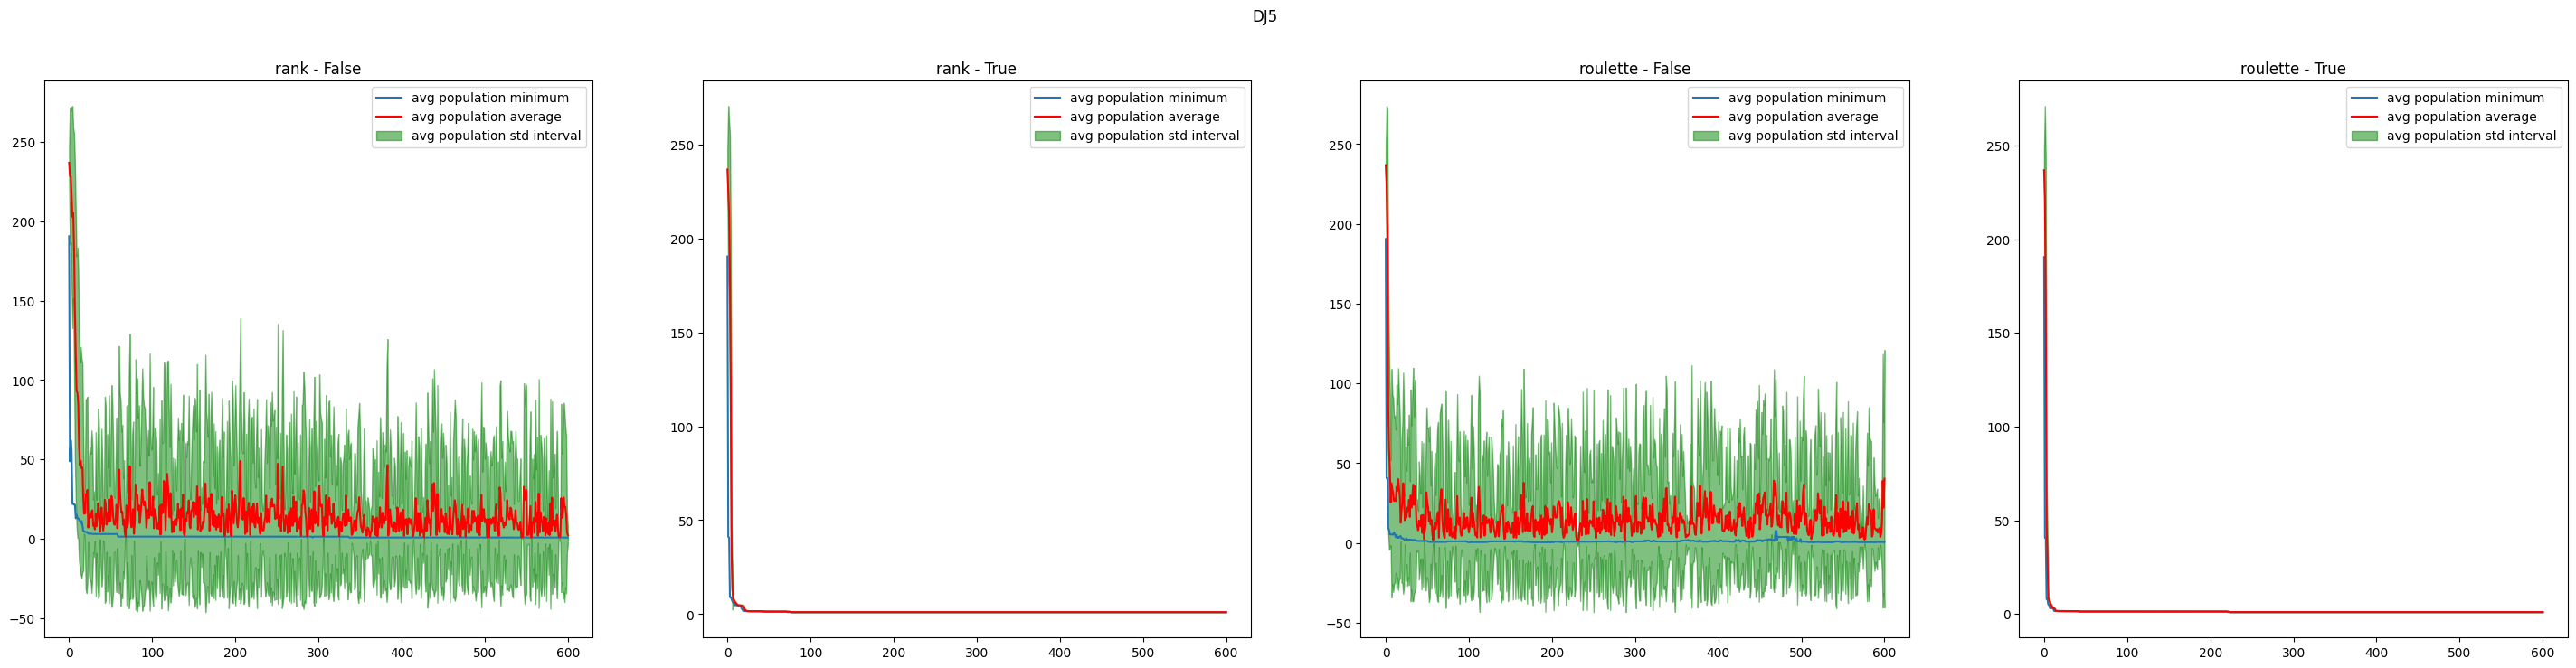

In [15]:
methods = ['rank', 'rank + elitism', 'roulette', 'roulette + elitism']
selection_rules = ['rank', 'roulette']
bool_elitism = [False, True]
seeds = [0, 42, 666]
functions = [[DeJong(1), 'DJ1'], [DeJong(2), 'DJ2'], [DeJong(3), 'DJ3'], [DeJong(4), 'DJ4'], [DeJong(5), 'DJ5']]

c_labels2 = ['Function', 'Method', 'Best solution', 'Best fitness value', 'Best iteration']
small_data = []


for de_jong in functions:
    fig, axes = plt.subplots(nrows=1, ncols=len(methods), figsize=(36, 8))
    fig.suptitle(f'{de_jong[1]}')
    c = -1
    for i_selection_rule in selection_rules:
      for e in bool_elitism:
        c += 1

        t_objective_mins = np.zeros(601)
        t_objective_averages = np.zeros(601)
        t_objective_std = np.zeros(601)
        averaged_best_min = 0
        averaged_best_fit = 0
        averaged_best_iter = 0

        for seed in seeds:
          np.random.seed(seed)
          ga = GeneticAlgorithmForDJ(de_jong[0], i_selection_rule, elitism=e)
          ga.solve()

          t_objective_mins = np.add(t_objective_mins, ga.objective_mins)/len(seeds)
          t_objective_averages = np.add(t_objective_averages, ga.objective_averages)/len(seeds)
          t_objective_std = np.add(t_objective_std, ga.objective_std)/len(seeds)

          averaged_best_min += ga.best_solution/len(seeds)
          averaged_best_fit += ga.best_fit/len(seeds)
          averaged_best_iter += ga.best_iter/len(seeds)

        axes[c].set_title(str(i_selection_rule) + ' - ' + str(e))
        axes[c].plot(t_objective_mins, label='avg population minimum')
        axes[c].plot(t_objective_averages, label='avg population average', color='red')
        #plot the std interval
        axes[c].fill_between([i for i in range(601)],
                             np.subtract(np.array(t_objective_averages),np.array(t_objective_std)),
                             np.add(np.array(t_objective_averages),np.array(t_objective_std)),
                             label='avg population std interval', color='green', alpha=0.5)
        axes[c].legend(loc="upper right")

        small_data.append([de_jong[1], str(i_selection_rule) + ' + ' + str(e), averaged_best_min, averaged_best_fit, averaged_best_iter])

    plt.show()

df = pd.DataFrame(small_data, columns=c_labels2)

In [16]:
df

Function            Method  Best solution  Best fitness value  \
0       DJ1      rank + False       0.000000                 1.0   
1       DJ1       rank + True       0.000000                 1.0   
2       DJ1  roulette + False       0.002167                 1.0   
3       DJ1   roulette + True       0.000000                 1.0   
4       DJ2      rank + False       0.090514                 1.0   
5       DJ2       rank + True       0.059632                 1.0   
6       DJ2  roulette + False       0.065961                 1.0   
7       DJ2   roulette + True       0.048949                 1.0   
8       DJ3      rank + False       4.000000                 1.0   
9       DJ3       rank + True       4.333333                 1.0   
10      DJ3  roulette + False       4.333333                 1.0   
11      DJ3   roulette + True       4.000000                 1.0   
12      DJ4      rank + False      -0.509572                 1.0   
13      DJ4       rank + True      -2.357062                 1.0   
14      DJ4  roulette + False      -0.249934                 1.0   
15      DJ4   roulette + True      -2.386595                 1.0   
16      DJ5      rank + False       1.329346                 1.0   
17      DJ5       rank + True       2.641618                 1.0   
18      DJ5  roulette + False       0.998004                 1.0   
19      DJ5   roulette + True       2.641618                 1.0   

    Best iteration  
0       139.666667  
1        91.666667  
2       519.333333  
3        74.333333  
4       417.666667  
5       283.333333  
6       161.666667  
7       416.333333  
8       285.666667  
9       140.333333  
10      268.333333  
11      260.666667  
12      550.666667  
13      458.666667  
14      599.000000  
15      443.333333  
16      280.333333  
17      135.000000  
18      421.000000  
19      178.333333